## Virtualizing Data Using Data Virtualization

## Overview and Prerequisites

In this notebook we will be virtualizing data from two different data sources: one on Db2 on CP4D (Flight Information), and another on Postgres (Airport Information).  

## Prerequisites
1. This notebook assumes that the flight information and airport information datasets for your specific month (e.g. 'jan', 'feb', etc.) are loaded into DB2 and Postgres respectively.
2. This notebook assumes that the DB2 data connection (called 'FlightInfoCP4D') and Postgres data connection (called 'Postgres DB') have already been added to the Data Virtualization instance. 
3. This notebook assumes that you have an enabled instance of IBM Data Virtualization and Watson Knowledge Catalog on Cloud Pak for Data (CP4D).

## Virtualizating Data Using Data Virtualization

### 1. Navigate to the Sandwich icon at the top left corner, then go to 'Data' > 'Data Virtualization'. This will take you to a view of your data sources available for virtualization.

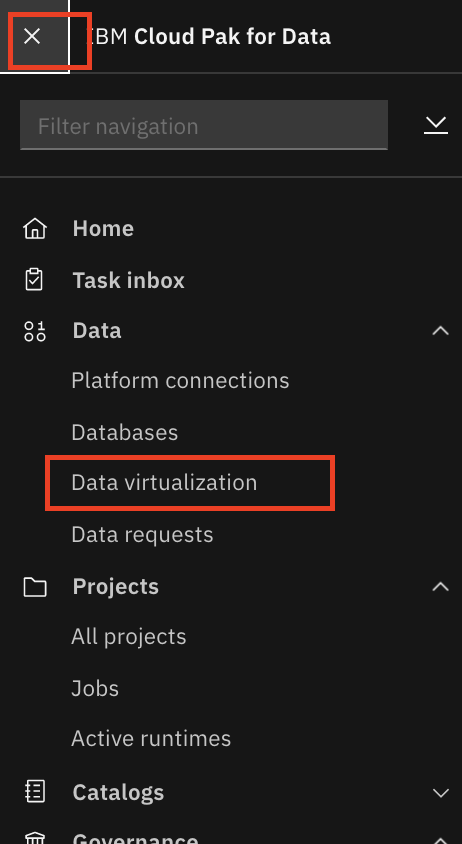

### 2.  Navigate to 'Data sources' at the top left, select the dropdown, and navigate to 'Virtualize'. This will take you to the page listing all tables eligble for virtualization. 

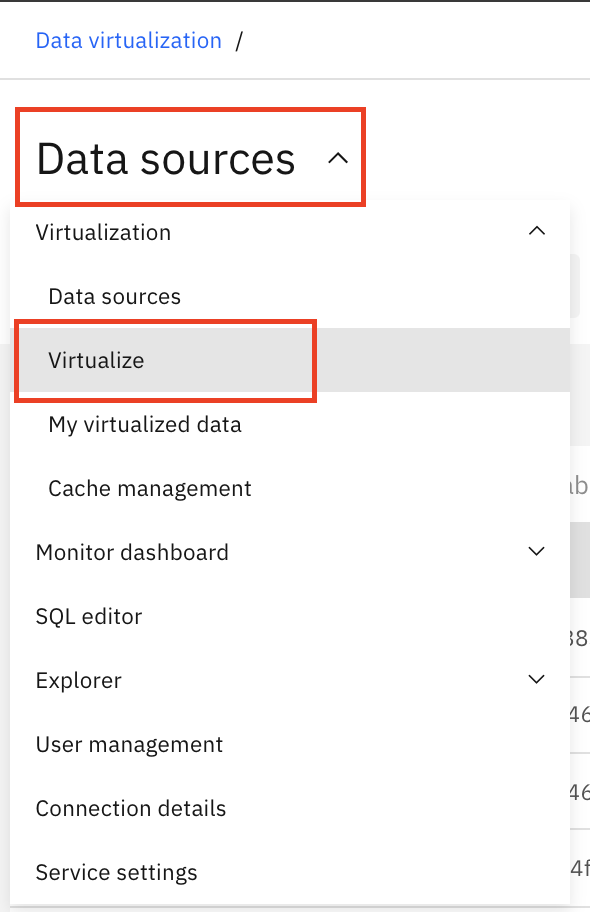

### 3. Type the three letter month corresponding to your dataset (e.g. 'jun' will be used as an example going forward) in the searchbar on the 'Virtualize' page. You will be able to see the '_MONTH_FLIGHT_INFORMATION' (located in CP4D) and 'MONTH_airport_information' (located in Postgres) tables. Check the tables and click 'Add to cart' >'View Cart'.

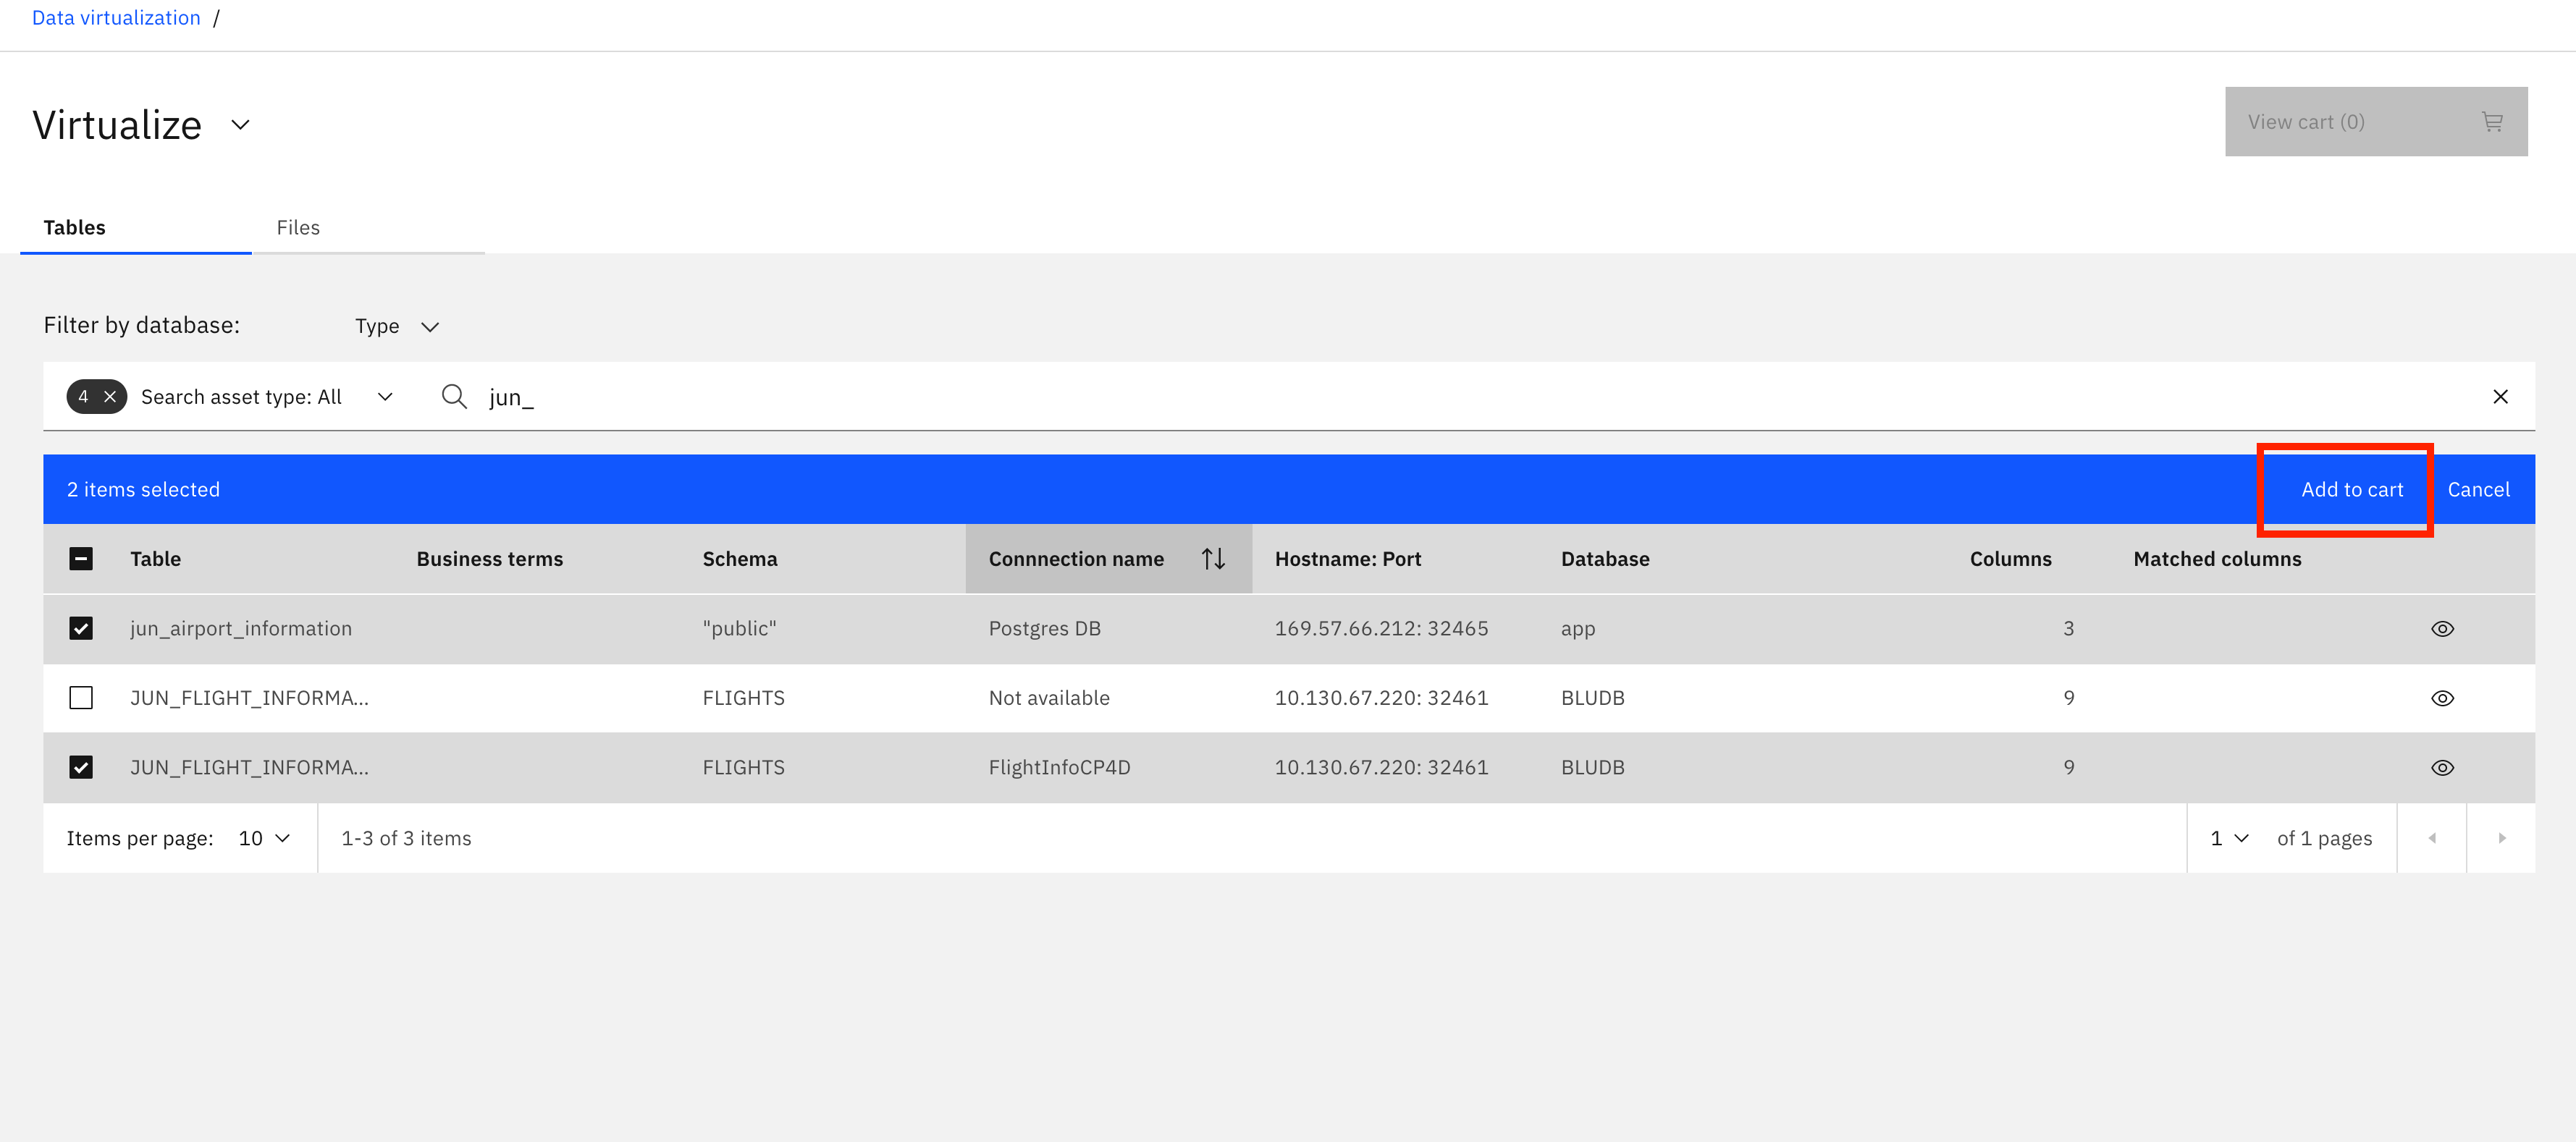

### 4. Click on 'View Cart'. This will take you to the 'Review cart and virtualize tables' page.  The 'schema' should autofill with your username, e.g ('USER6').  Ensure that this is the case.  If not, change the schema to your username.

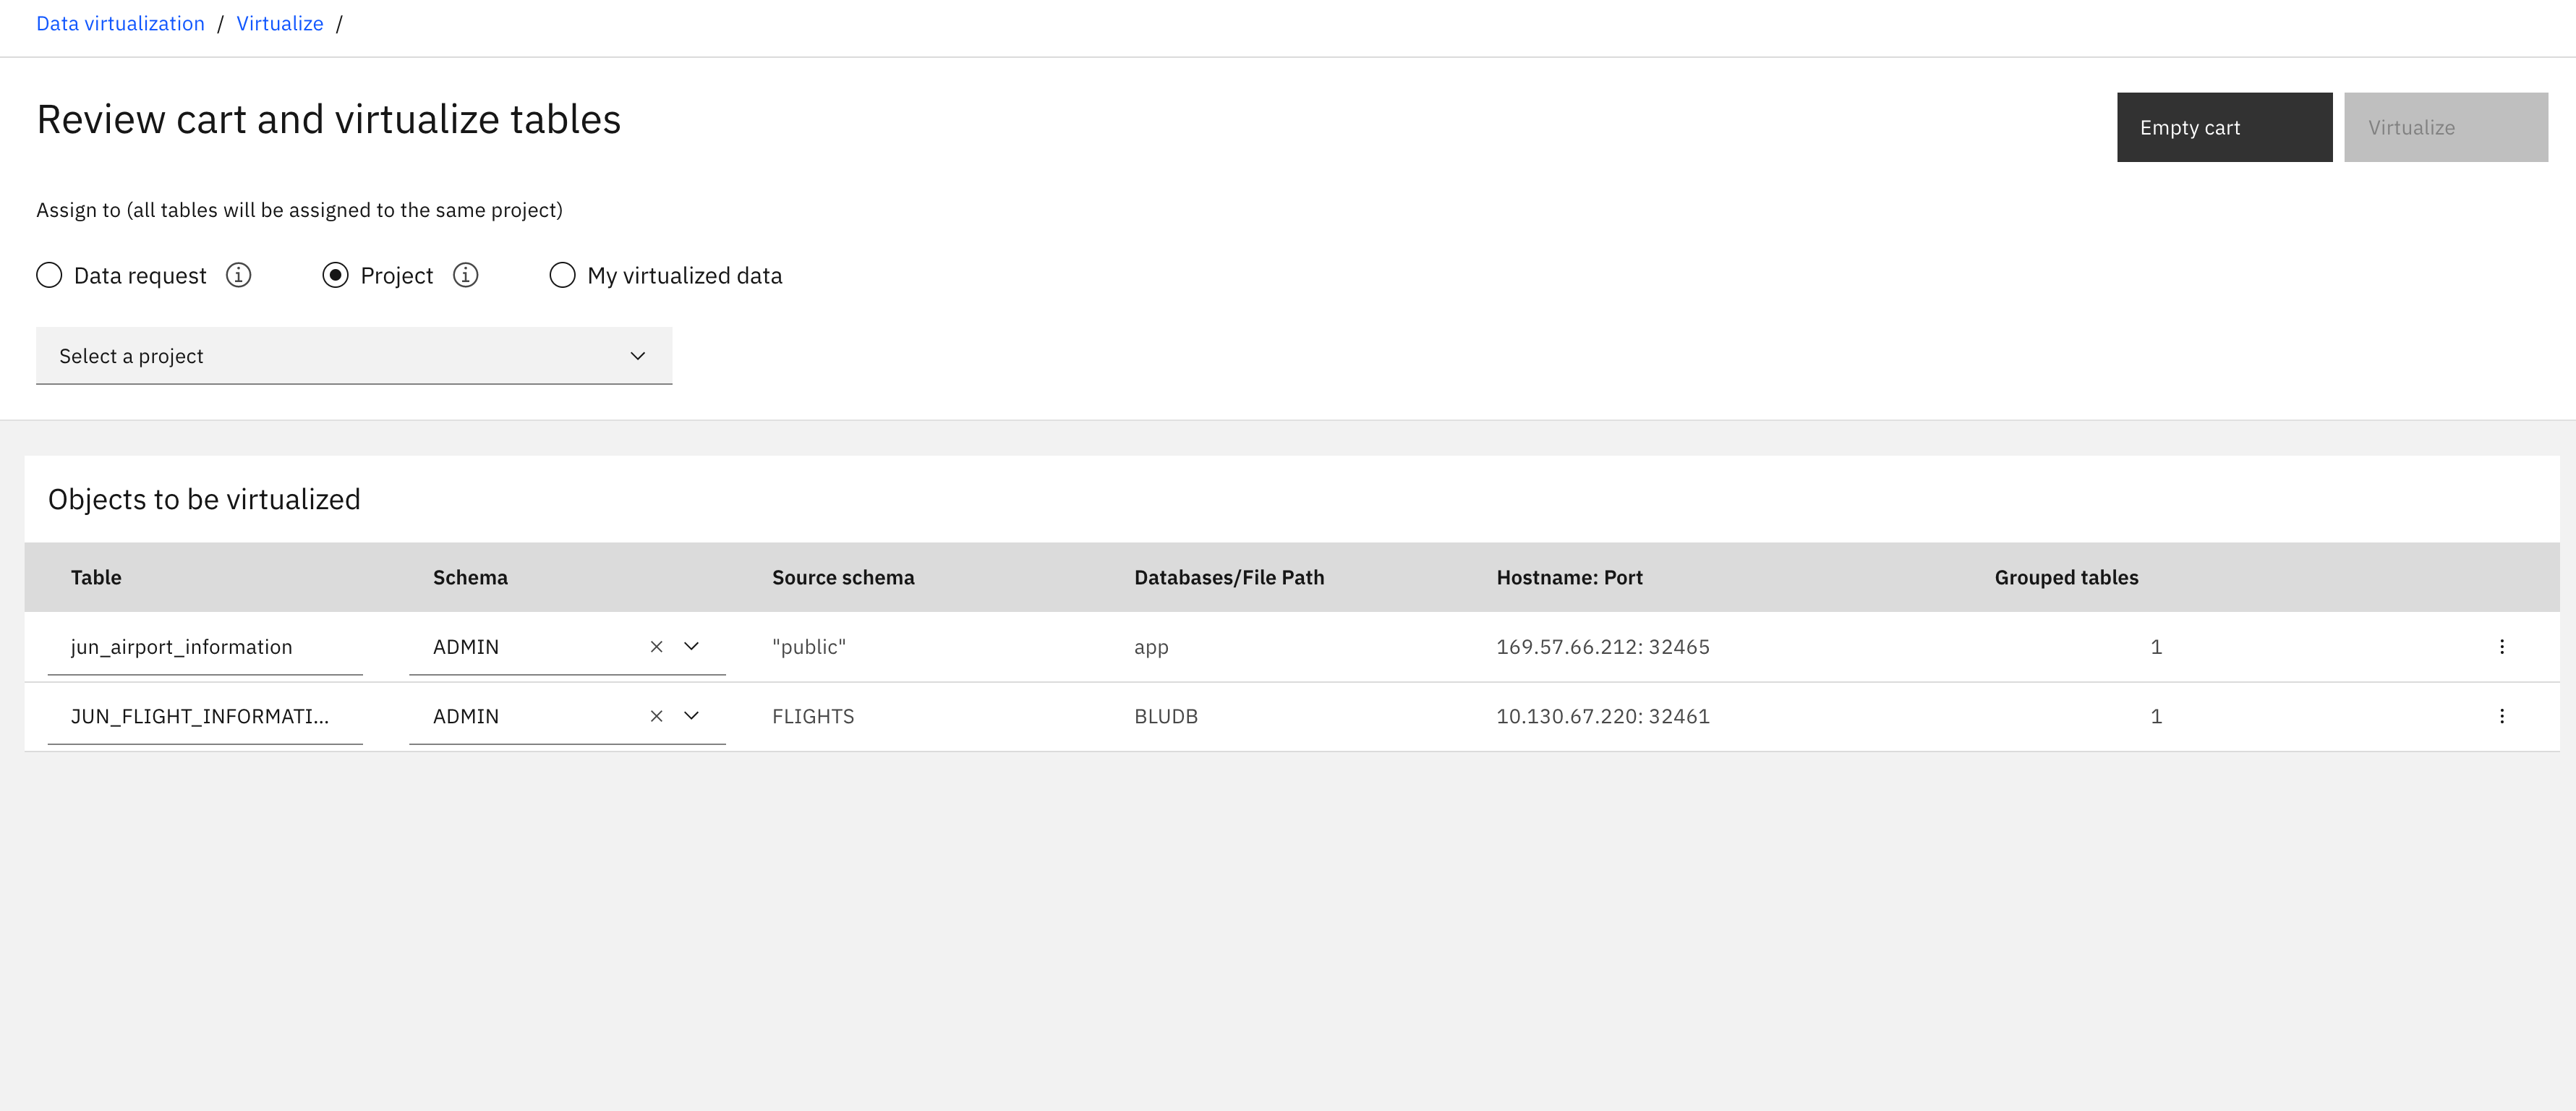

### 5. Select 'My Virtualized Data', verify that the 'schema' is your username,  and then click 'Virtualize' at the top right corner.  

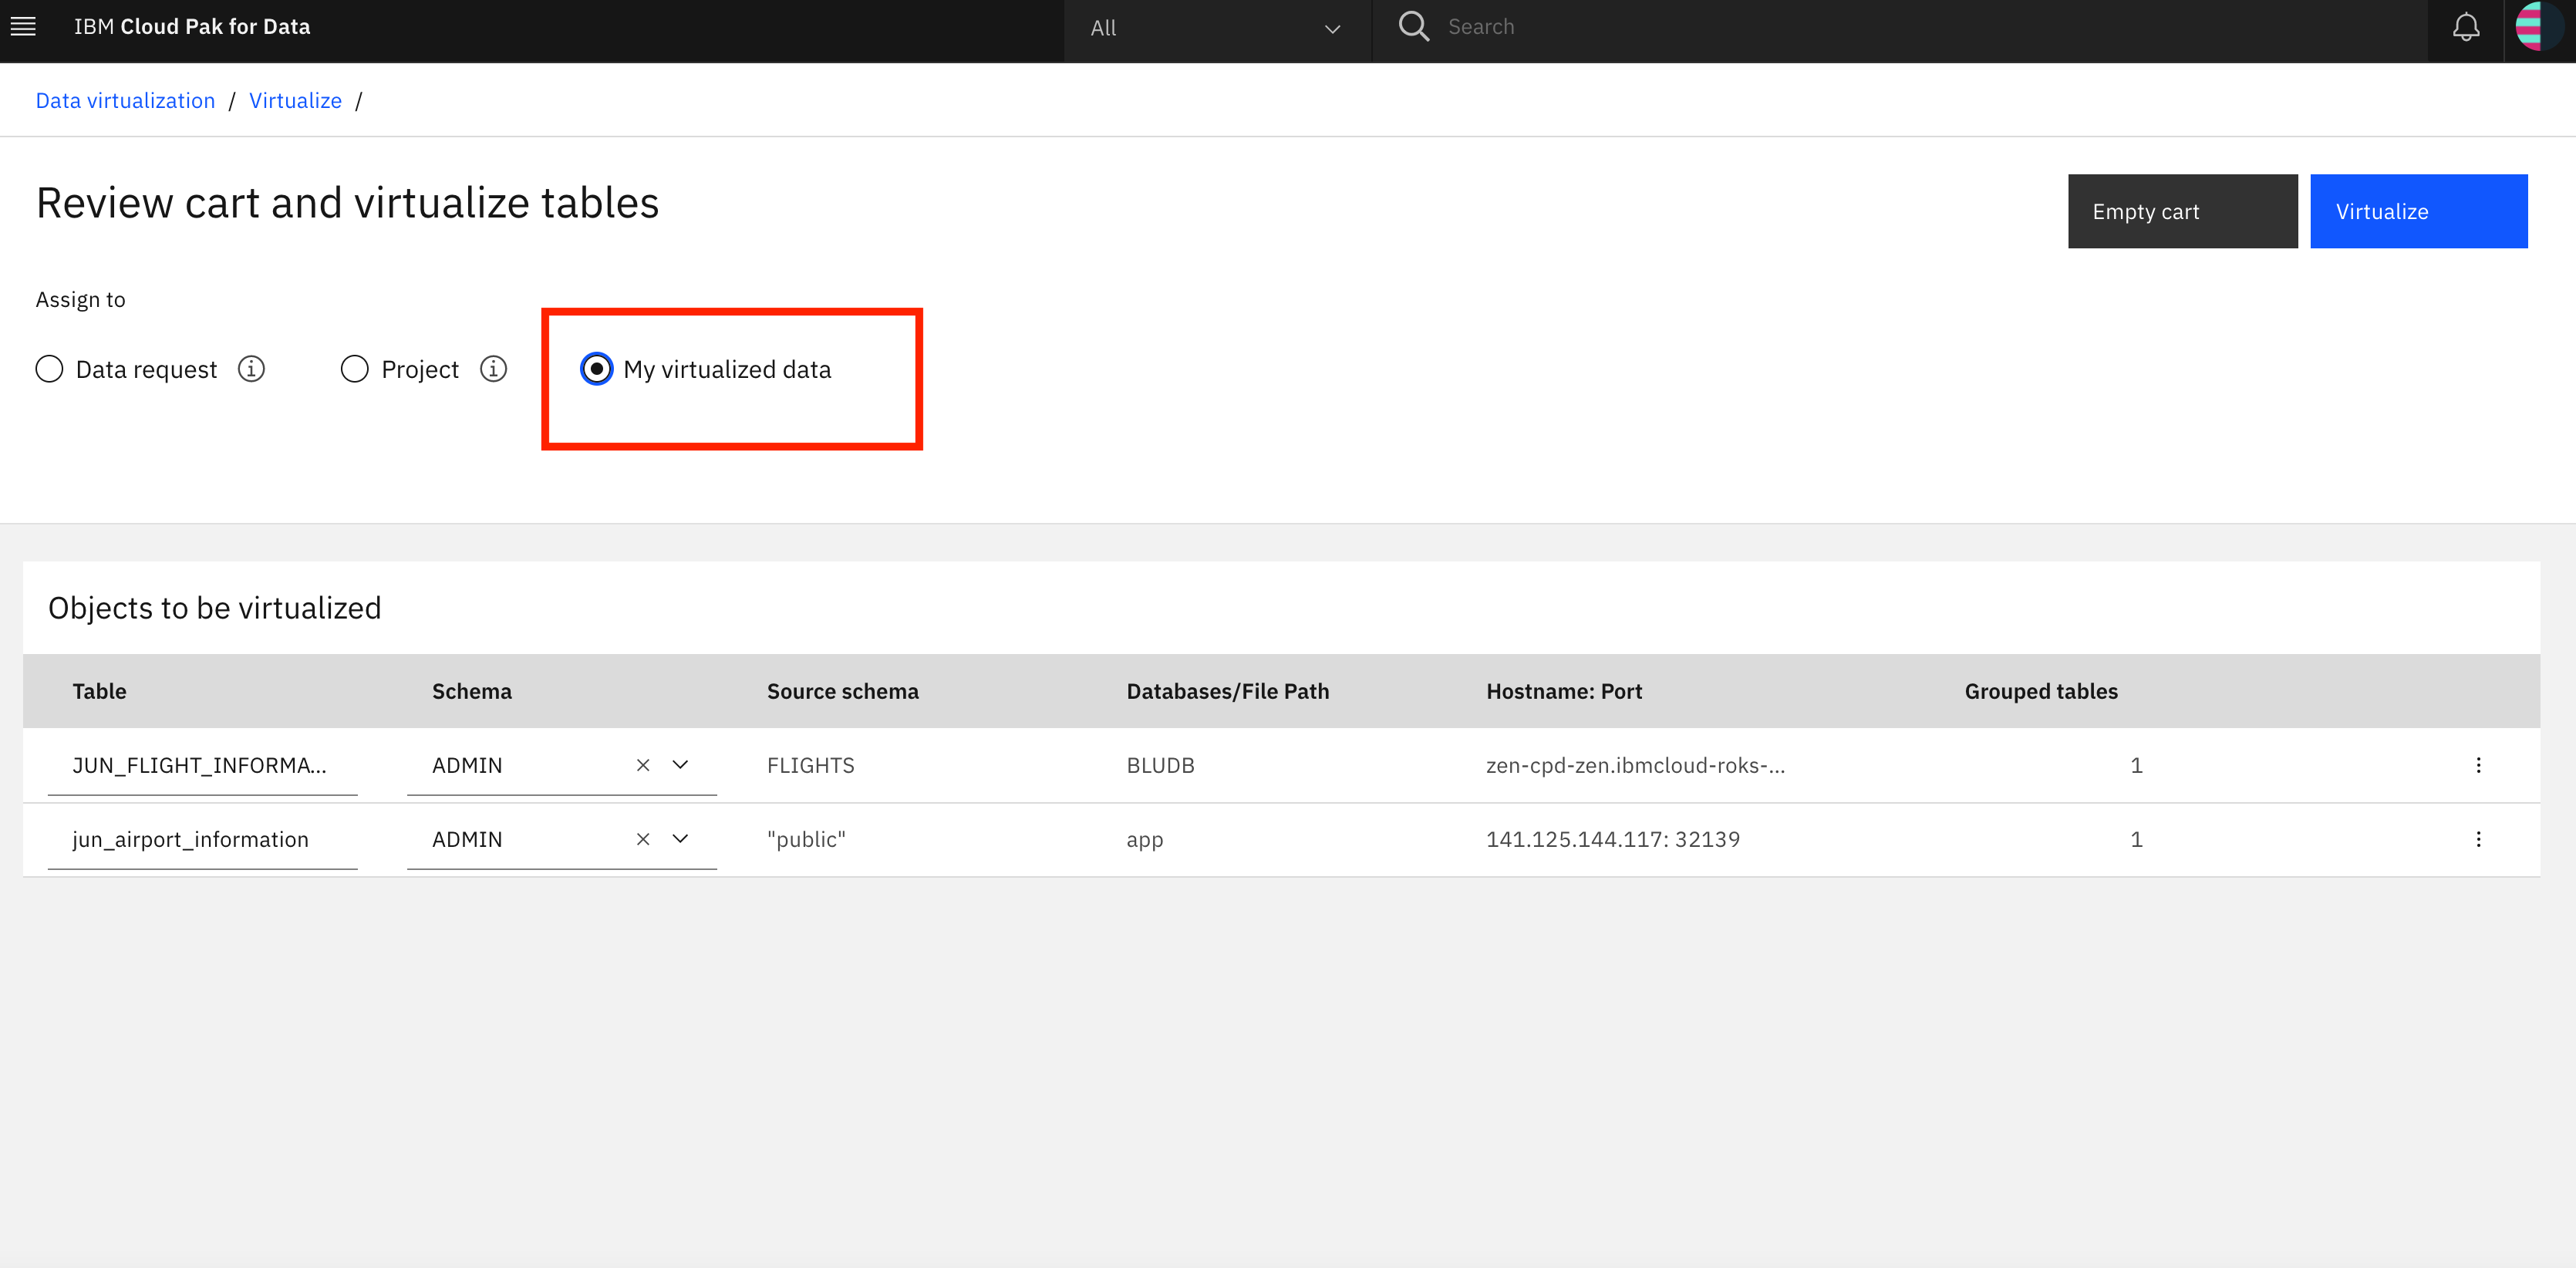

### 6. Once the data is virtualized, a 'Virtualize Objects' screen will pop up. Click on 'View my virtualized data'. This will take you to the 'My virtualized data' page. 

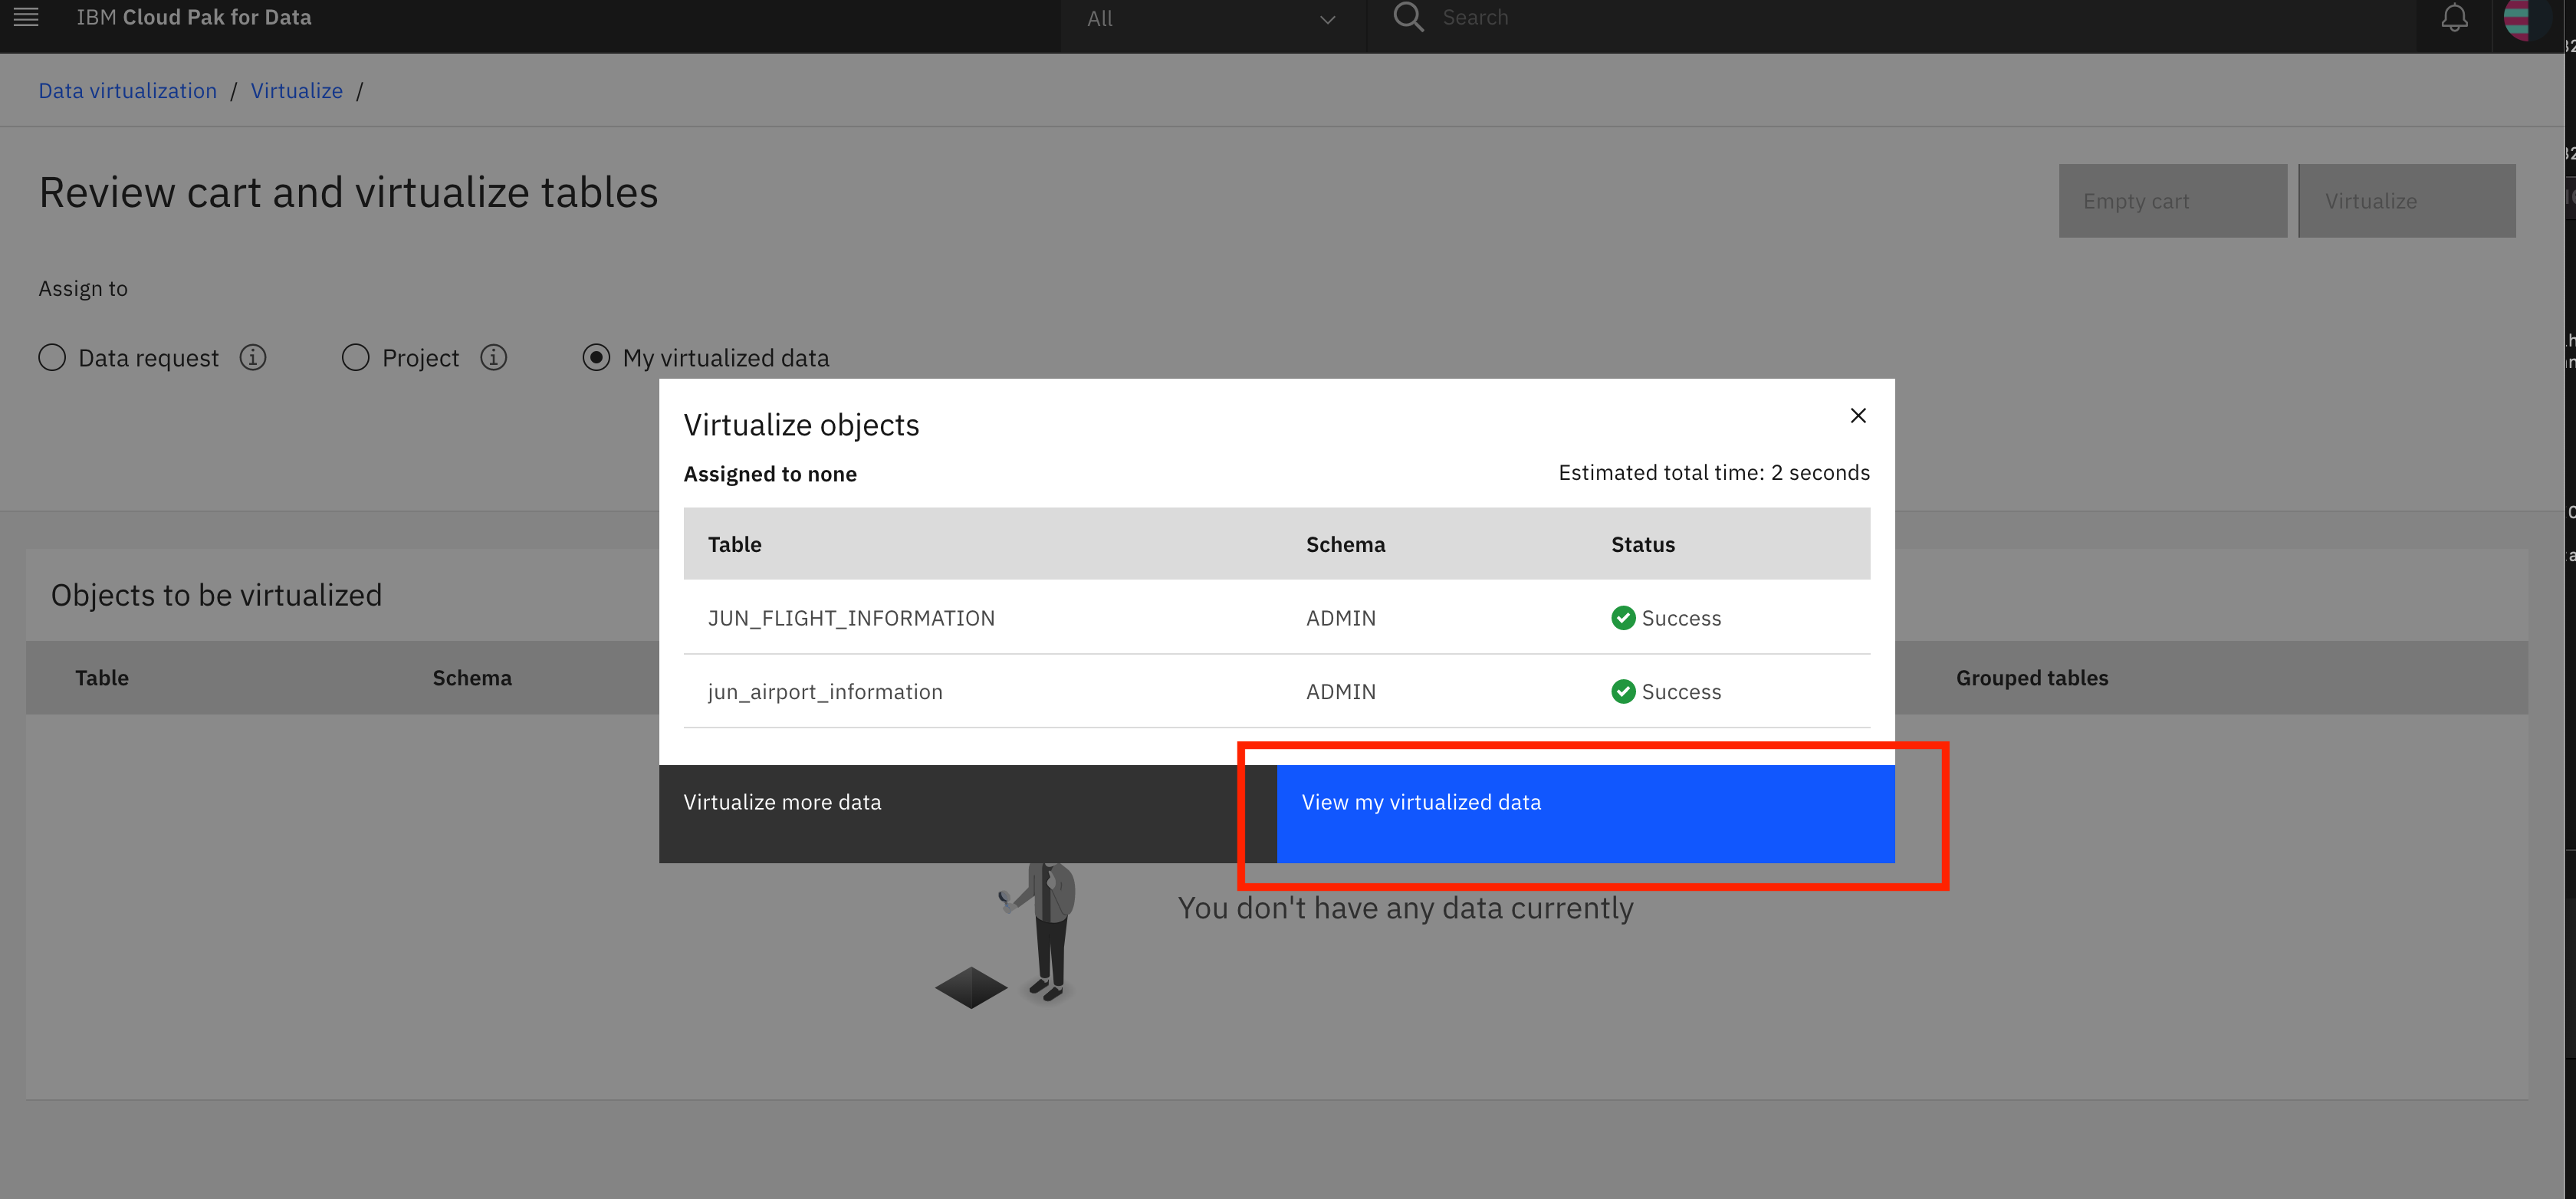

### 7. In the 'My virtualized data' page, check the boxes on _MONTH_FLIGHT_INFORMATION and _MONTH_airport_information (now virtualized datasets) and click 'Join'. This will take you to the 'Join virtual objects' page. 

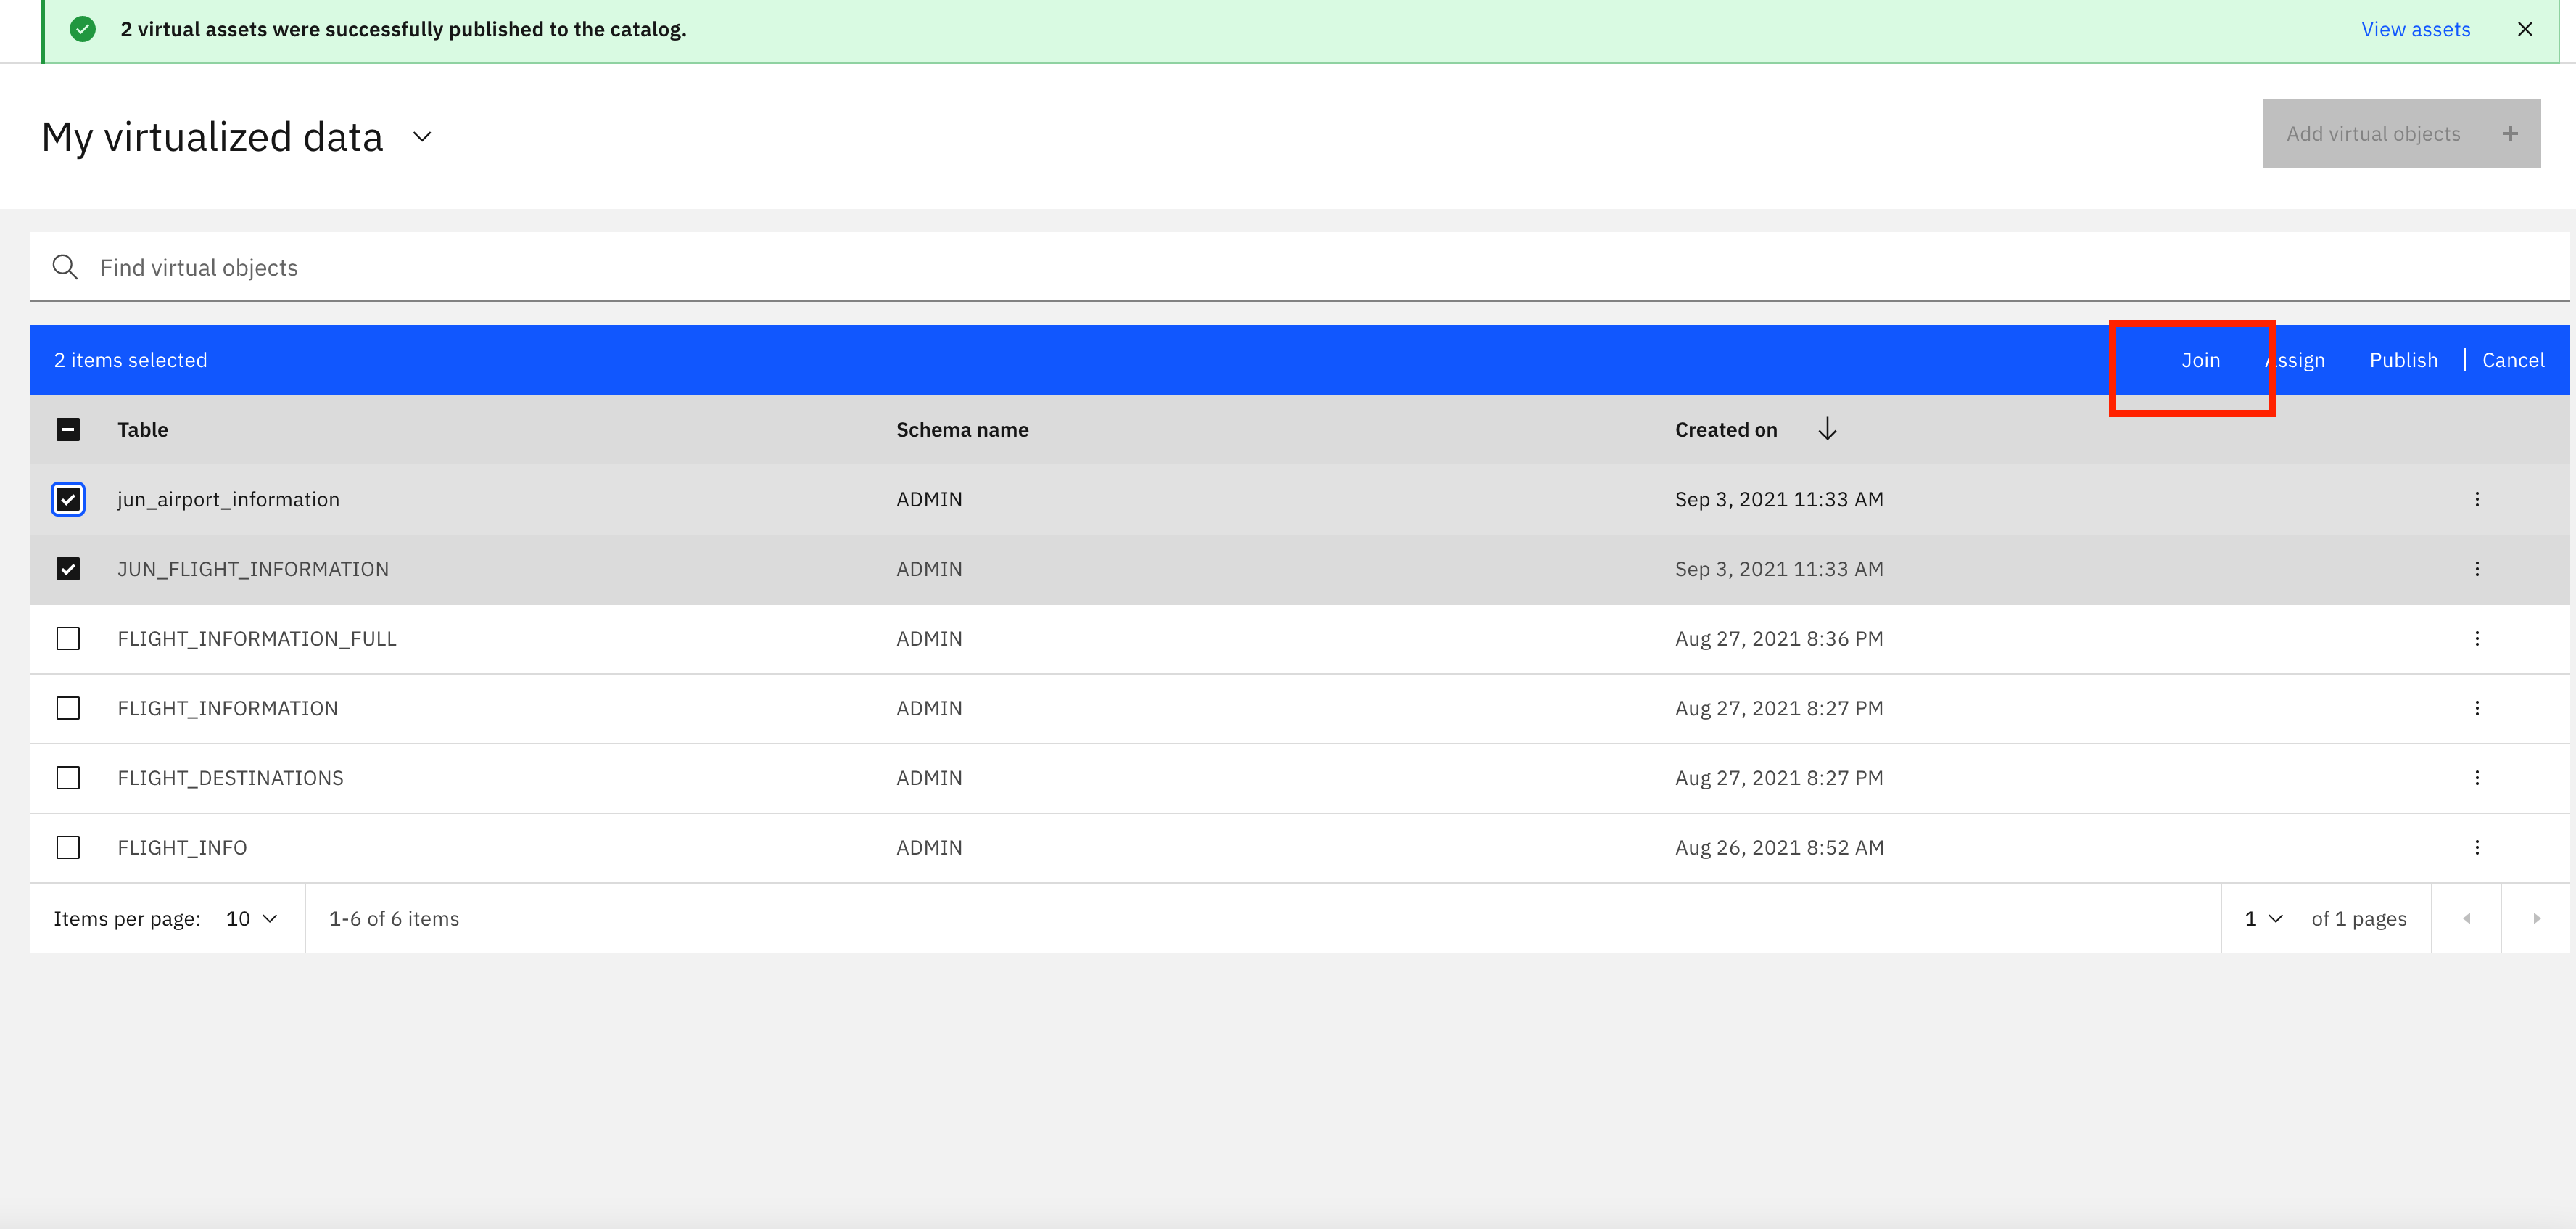

### 8. On the 'Join virtual objects' page, click and drag 'flight_id' from the left hand table (_MONTH_airport_information) to 'FLIGHT_ID on the right hand table (_MONTH_AIRPORT_INFORMATION). Then click 'Open in SQL editor' in the top right hand corner.
    FYI: You defined the merge key in this step. 
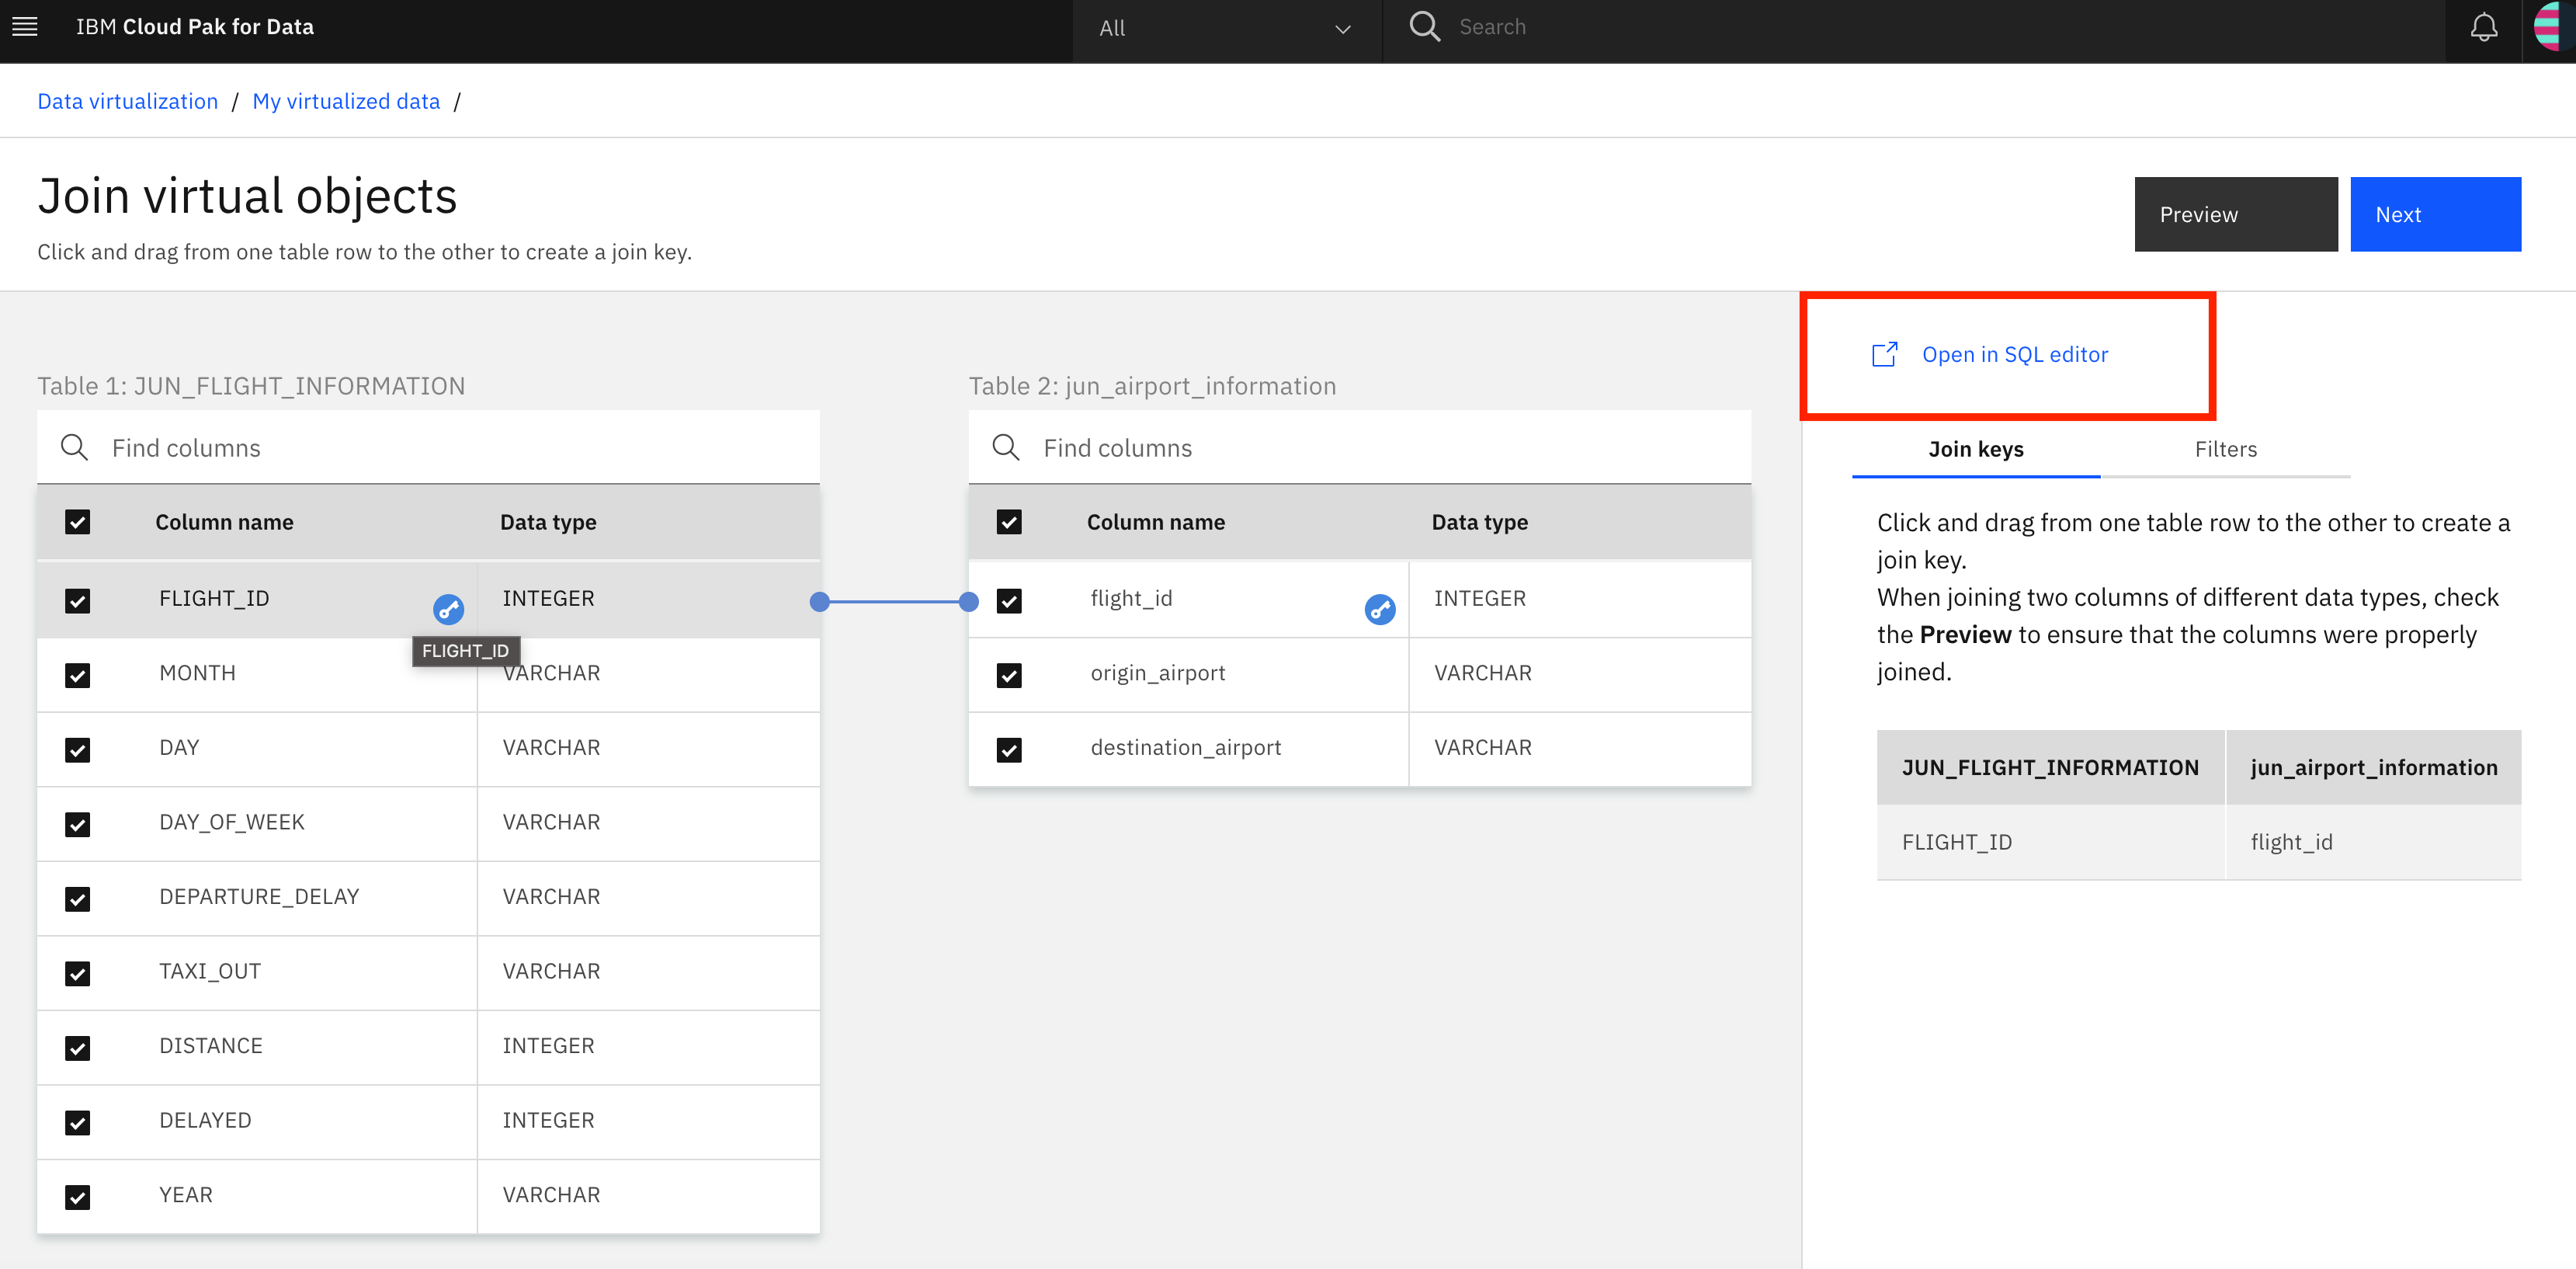

### 9. Edit the SQL query below to match the schema, table names, and group # for your group.  First, insert your group number into the view name: 'AIRLINE_VIRTUALIZED_DATA_GRP_Group#_'.  Then, replace every instance of USER# with the name of your Data Virtualization Schema (which should be your username as declared in Step 5).  Finally, insert your 3-letter month into every table name (e.g. "FEB_FLIGHT_INFORMATION" and "feb_airport_information".  Below is a template query followed by a sample query.  Refer to both when creating your specific query. 

```CREATE VIEW AIRLINE_VIRTUALIZED_DATA_GRP<_Group#_>
         AS SELECT  "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION"."DAY" AS "DAY", 
         "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION"."DAY_OF_WEEK" AS "DAY_OF_WEEK", 
         "USER<#>"."<_month_>_airport_information"."origin_airport" AS "ORIGIN_AIRPORT", 
         "USER<#>"."<_month_>_airport_information"."destination_airport" AS "DESTINATION_AIRPORT",
         "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION"."DEPARTURE_DELAY" AS "DEPARTURE_DELAY", 
         "USER<#>"."<_MONTH_>FLIGHT_INFORMATION"."TAXI_OUT" AS "TAXI_OUT", 
         "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION"."DISTANCE" AS "DISTANCE", 
         "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION"."DELAYED" AS "DELAYED" 
              FROM "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION", "USER<#>"."<_month_>_airport_information" 
                  WHERE "USER<#>"."<_MONTH_>_FLIGHT_INFORMATION"."FLIGHT_ID"="USER<#>"."<_month_>_airport_information"."flight_id"```

### Sample Query Below for Group 6, User 10:
```CREATE VIEW AIRLINE_VIRTUALIZED_DATA_GRP6
      AS SELECT  "USER10"."JUN_FLIGHT_INFORMATION"."DAY" AS "DAY",
          "USER10"."JUN_FLIGHT_INFORMATION"."DAY_OF_WEEK" AS "DAY_OF_WEEK", 
          "USER10"."jun_airport_information"."origin_airport" AS "ORIGIN_AIRPORT", 
          "USER10"."jun_airport_information"."destination_airport" AS "DESTINATION_AIRPORT", 
          "USER10"."JUN_FLIGHT_INFORMATION"."DEPARTURE_DELAY" AS "DEPARTURE_DELAY", 
          "USER10"."JUN_FLIGHT_INFORMATION"."TAXI_OUT" AS "TAXI_OUT", 
          "USER10"."JUN_FLIGHT_INFORMATION"."DISTANCE" AS "DISTANCE", 
          "USER10"."JUN_FLIGHT_INFORMATION"."DELAYED" AS "DELAYED"
              FROM "USER10"."JUN_FLIGHT_INFORMATION", "USER10"."jun_airport_information" WHERE "USER10"."JUN_FLIGHT_INFORMATION"."FLIGHT_ID"="USER10"."jun_airport_information"."flight_id" ```

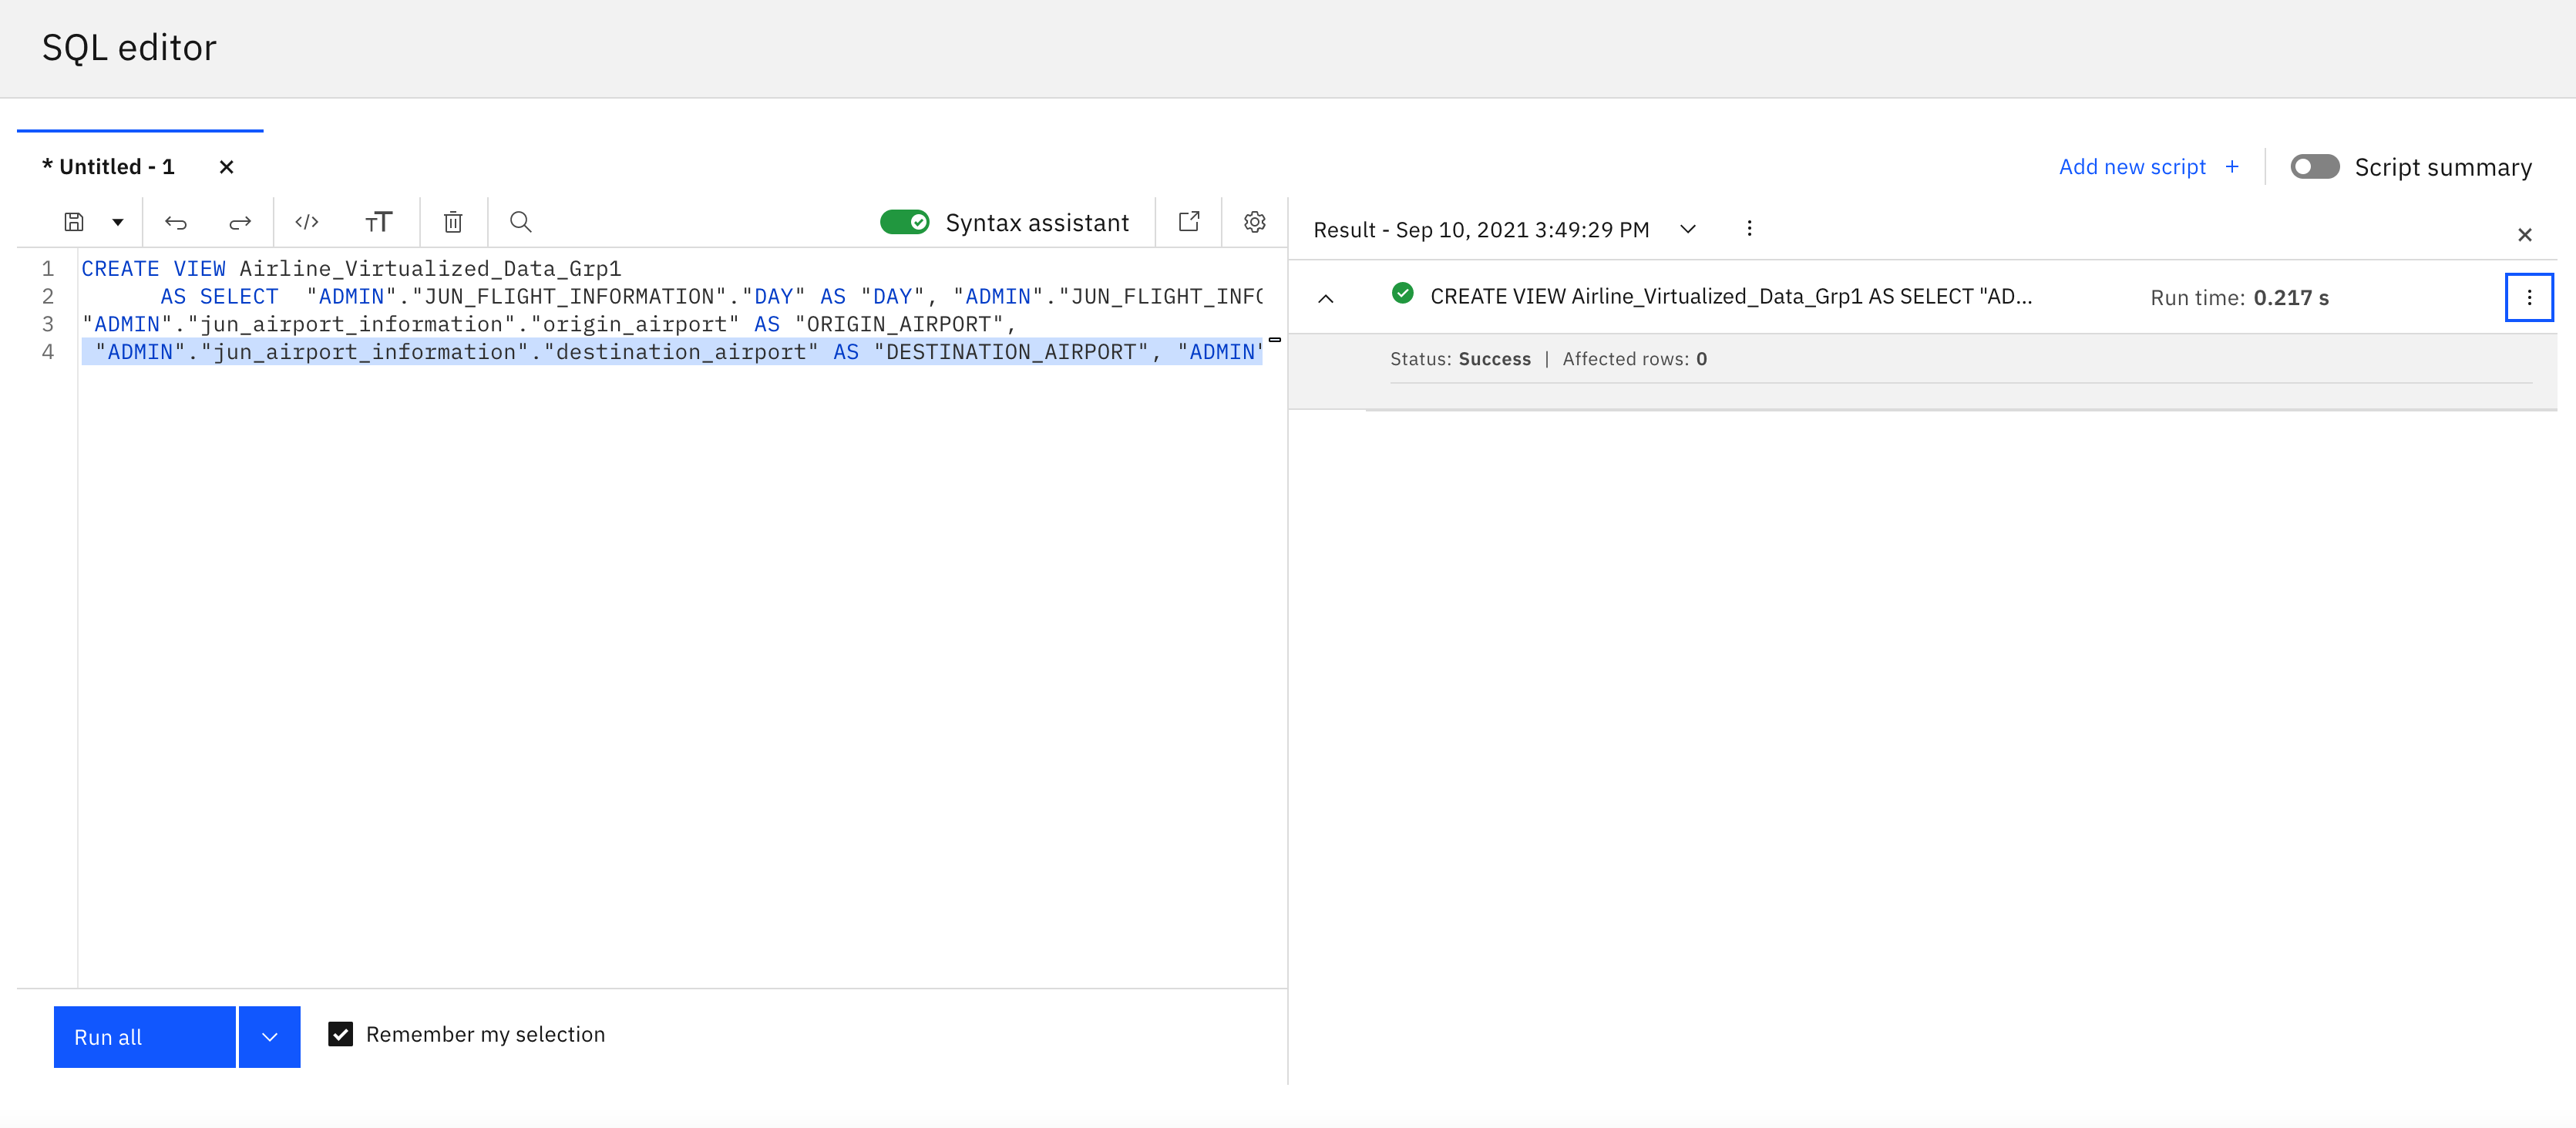

### 10. After entering the SQL query into the box, select 'Run all' in the bottom left hand corner.  This will create the joined view.
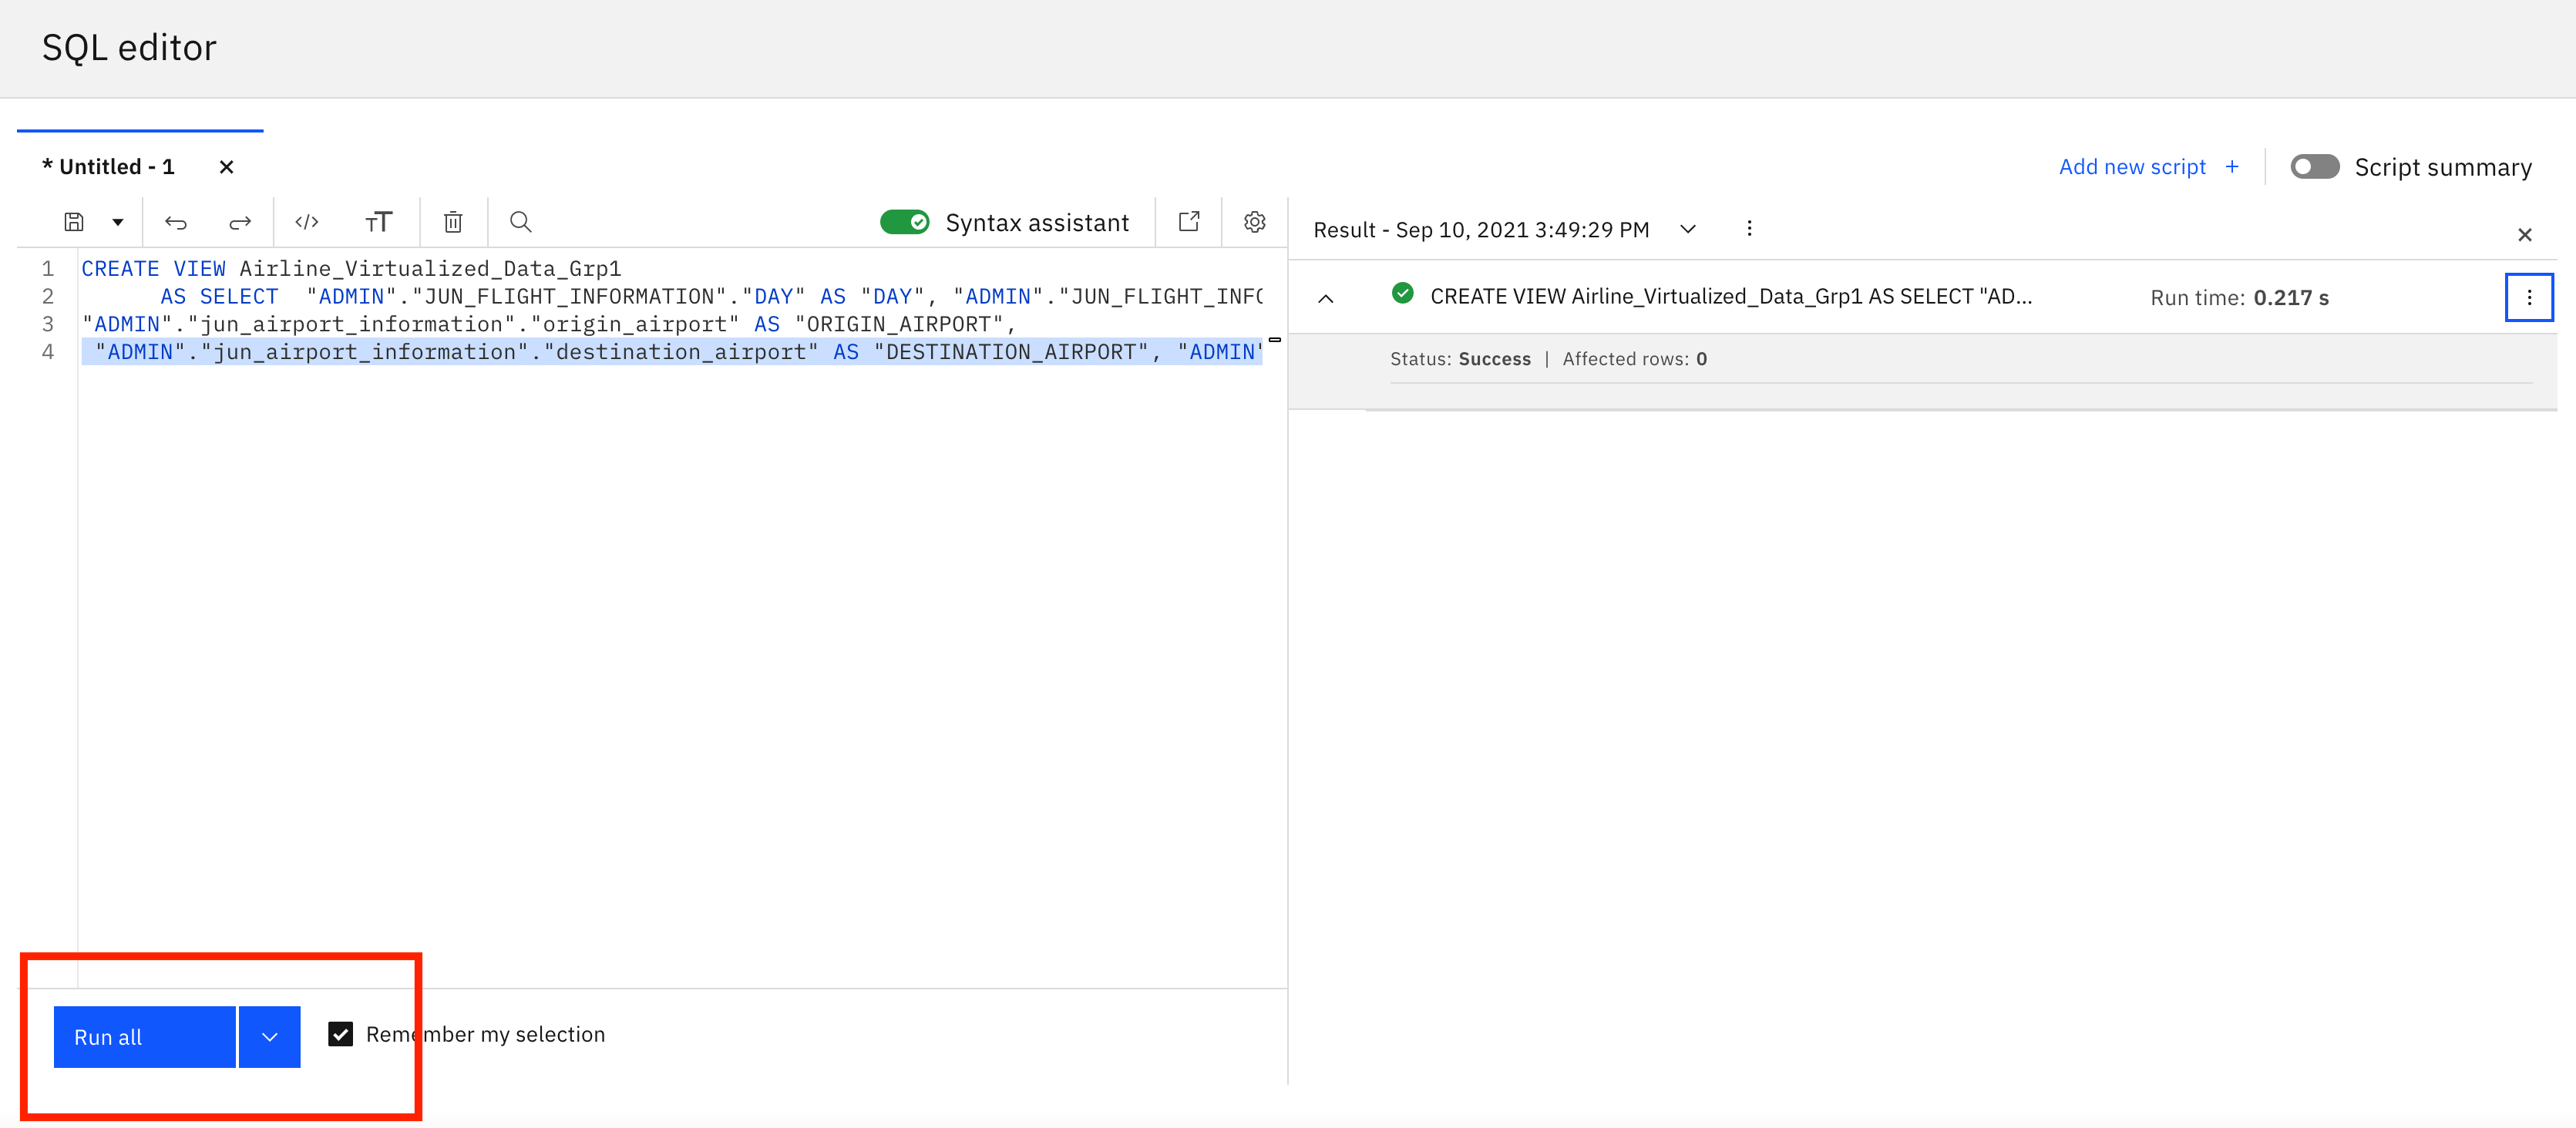

### 11. Go the navigation menu in the top lefthand corner and select 'Catalogs-> All catalogs'
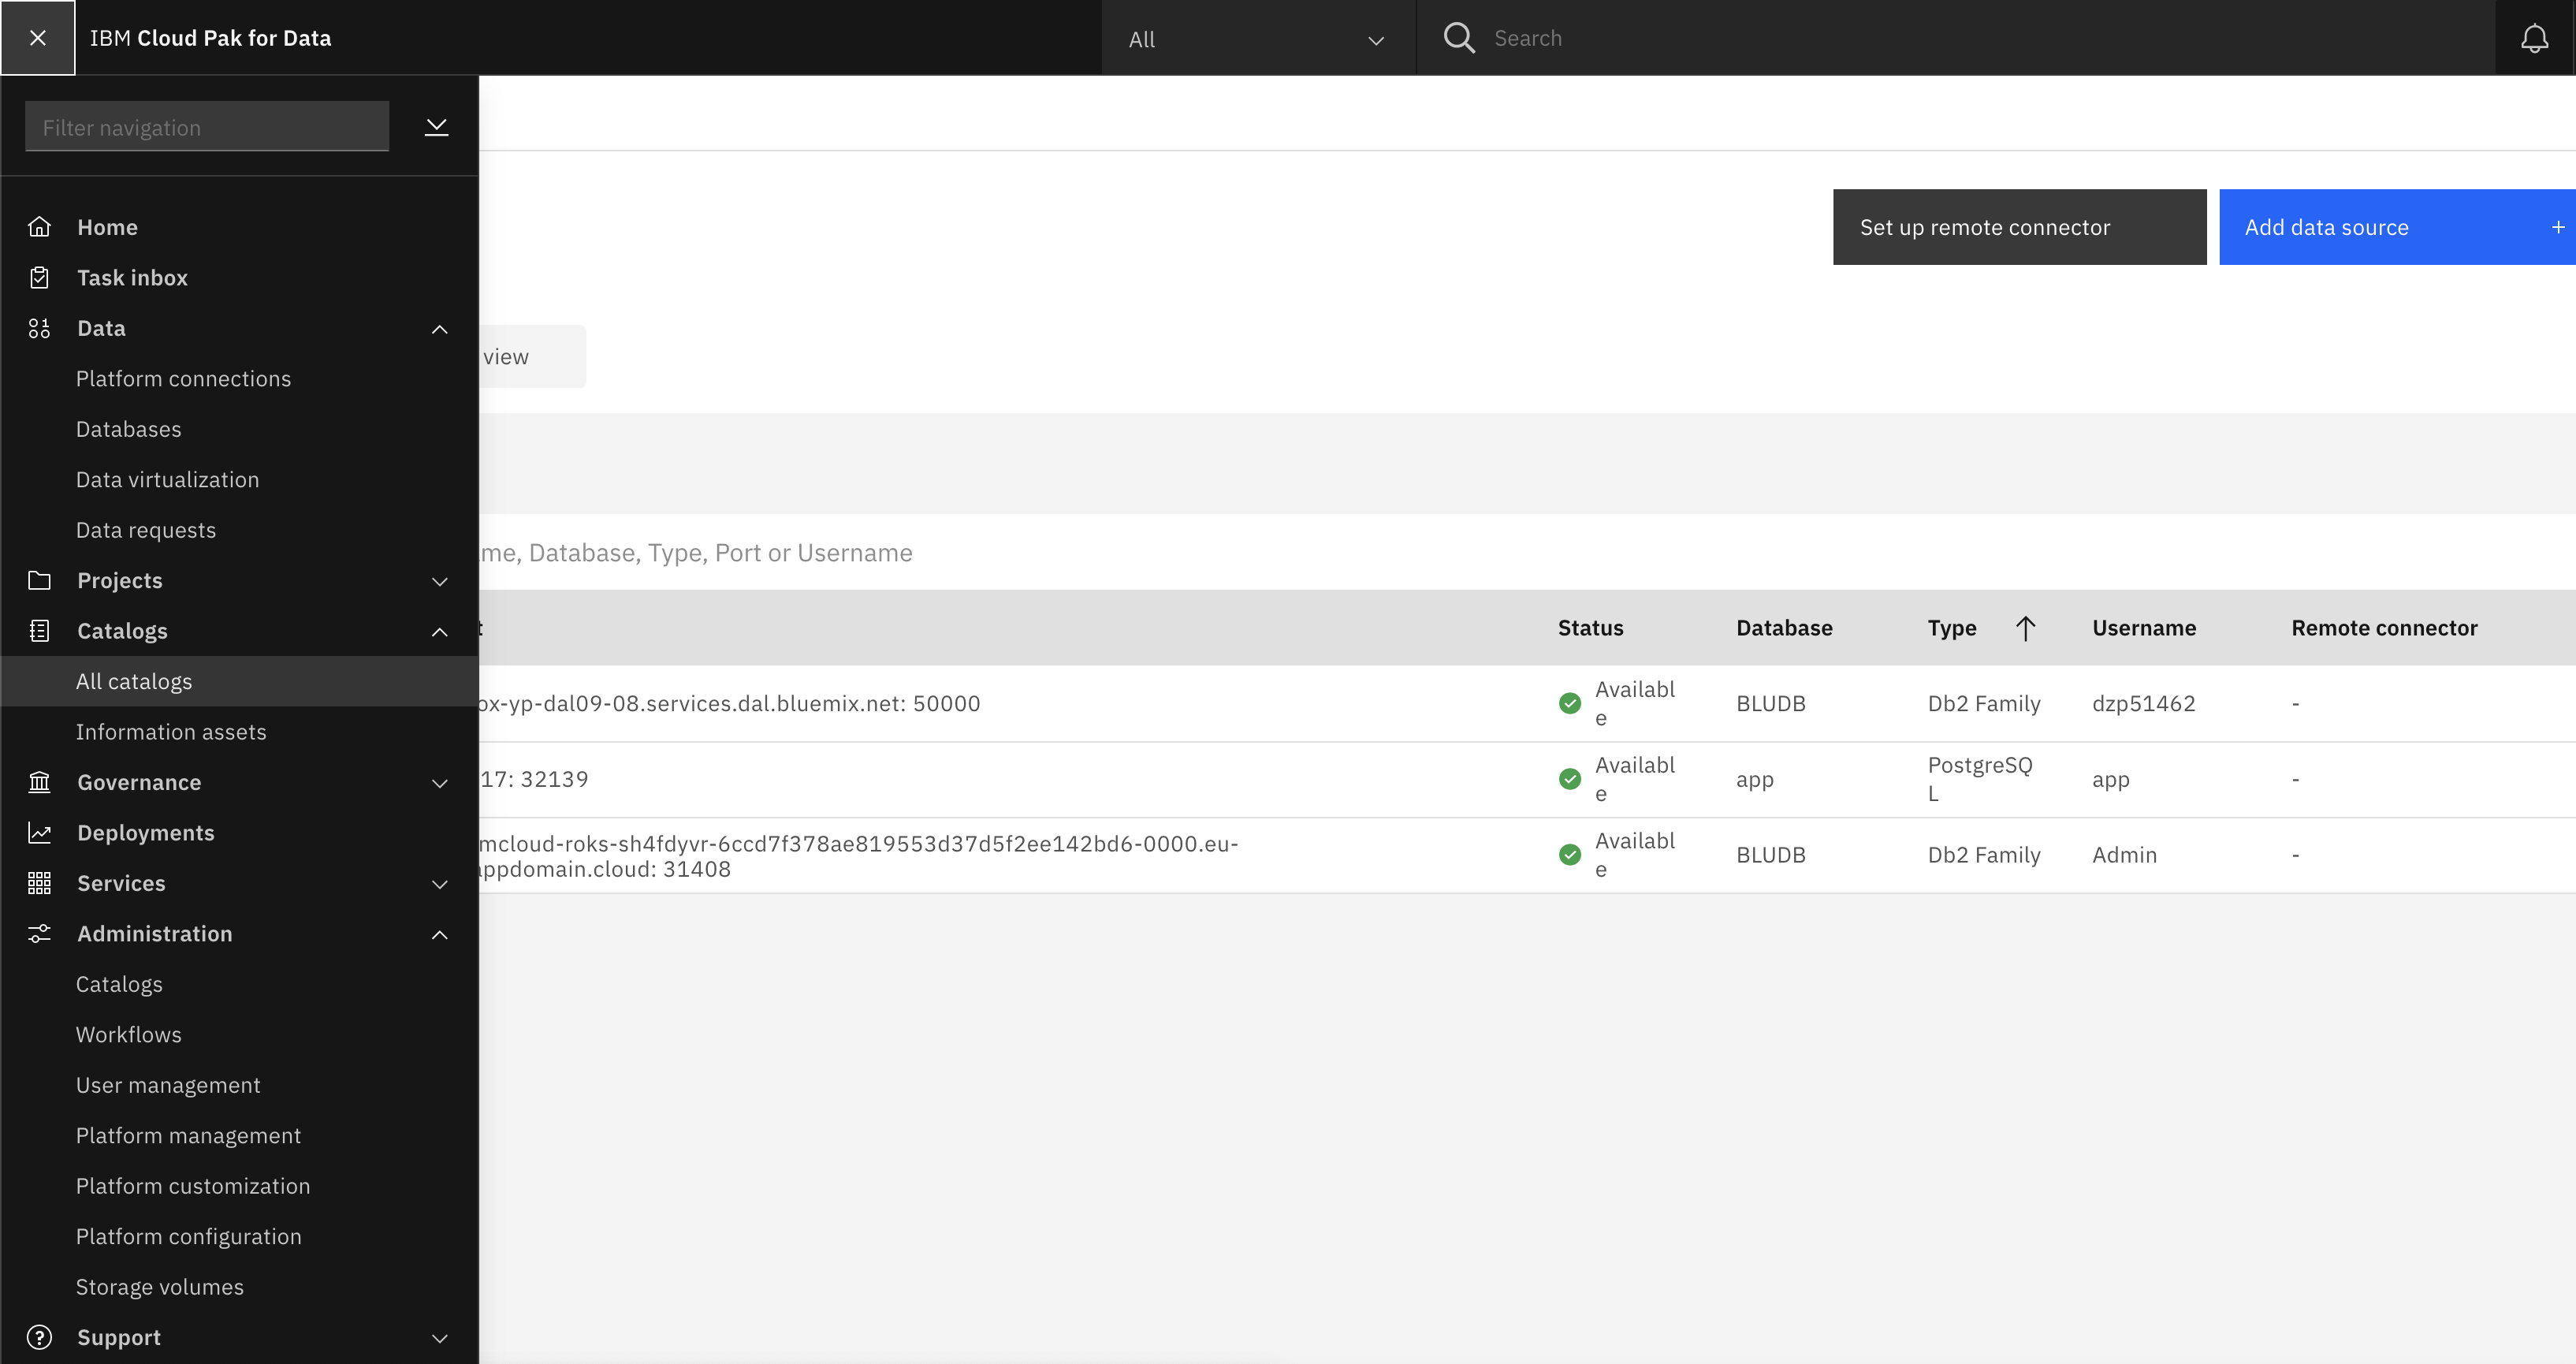

### 12. Select the catalog corresponding to your group ('Model_Catalog_Grp#')
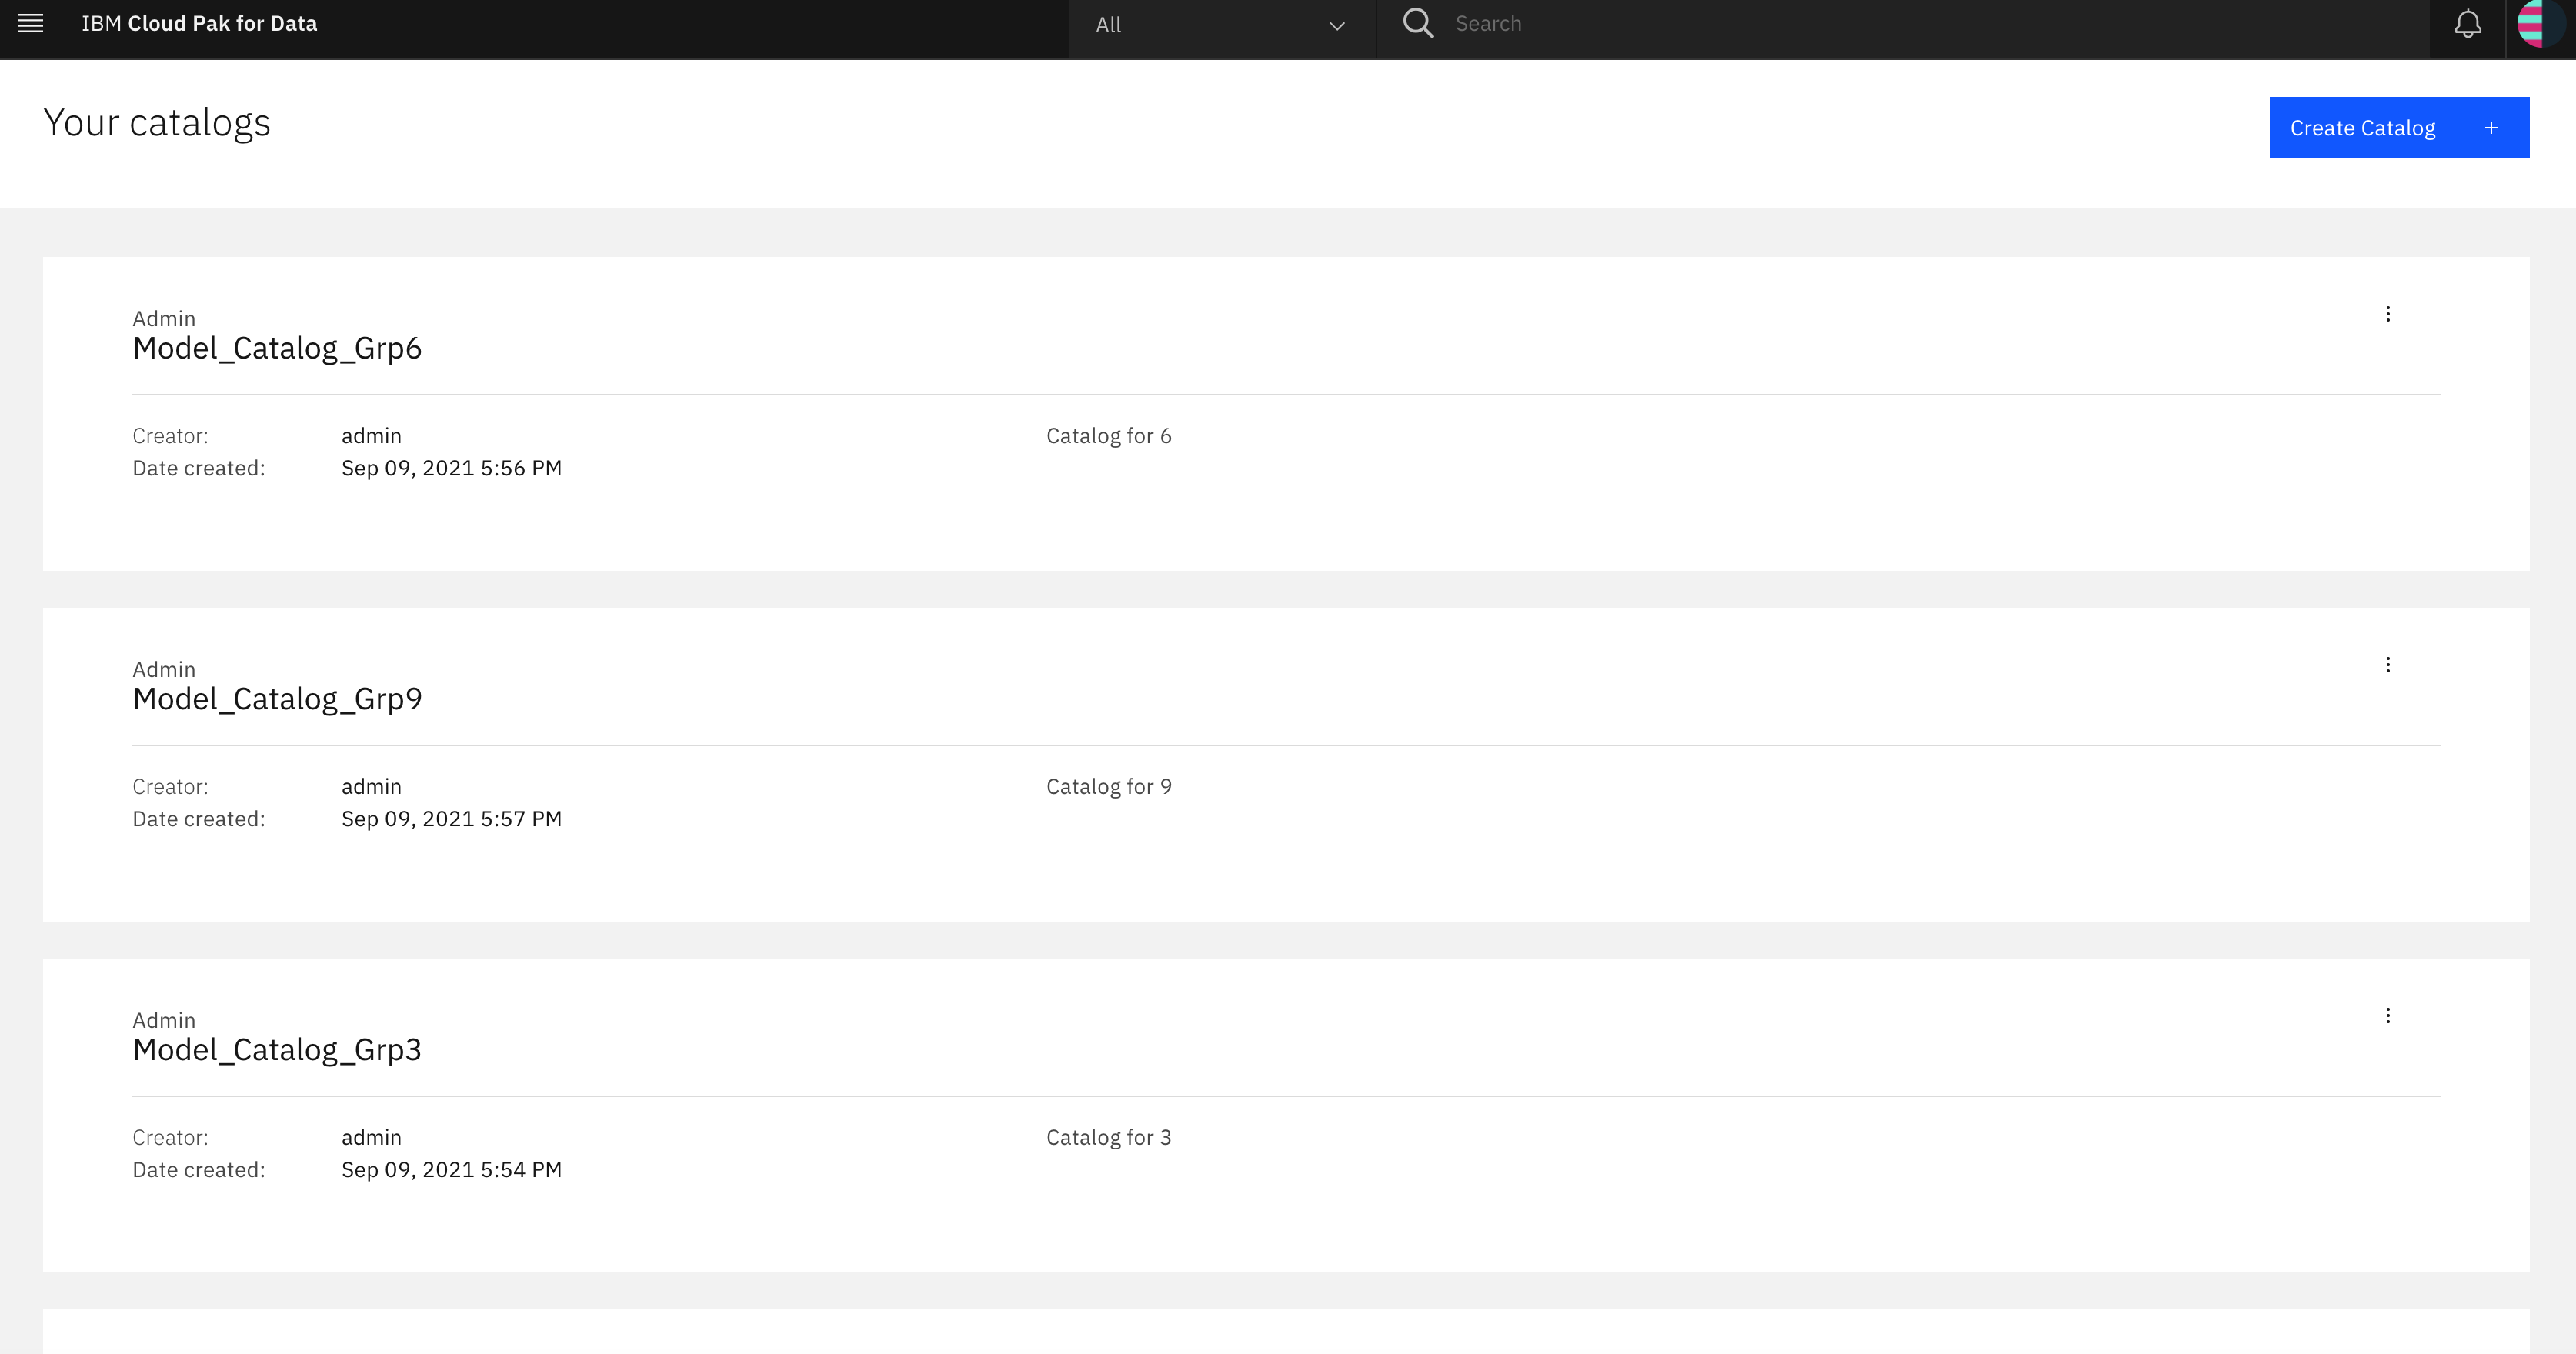

### 13. Once in the catalog, the connection to DV should already be in there ('DV Connection').  In the top righthand corner, select 'Add to Catalog  +' and then choose 'Connected asset'.
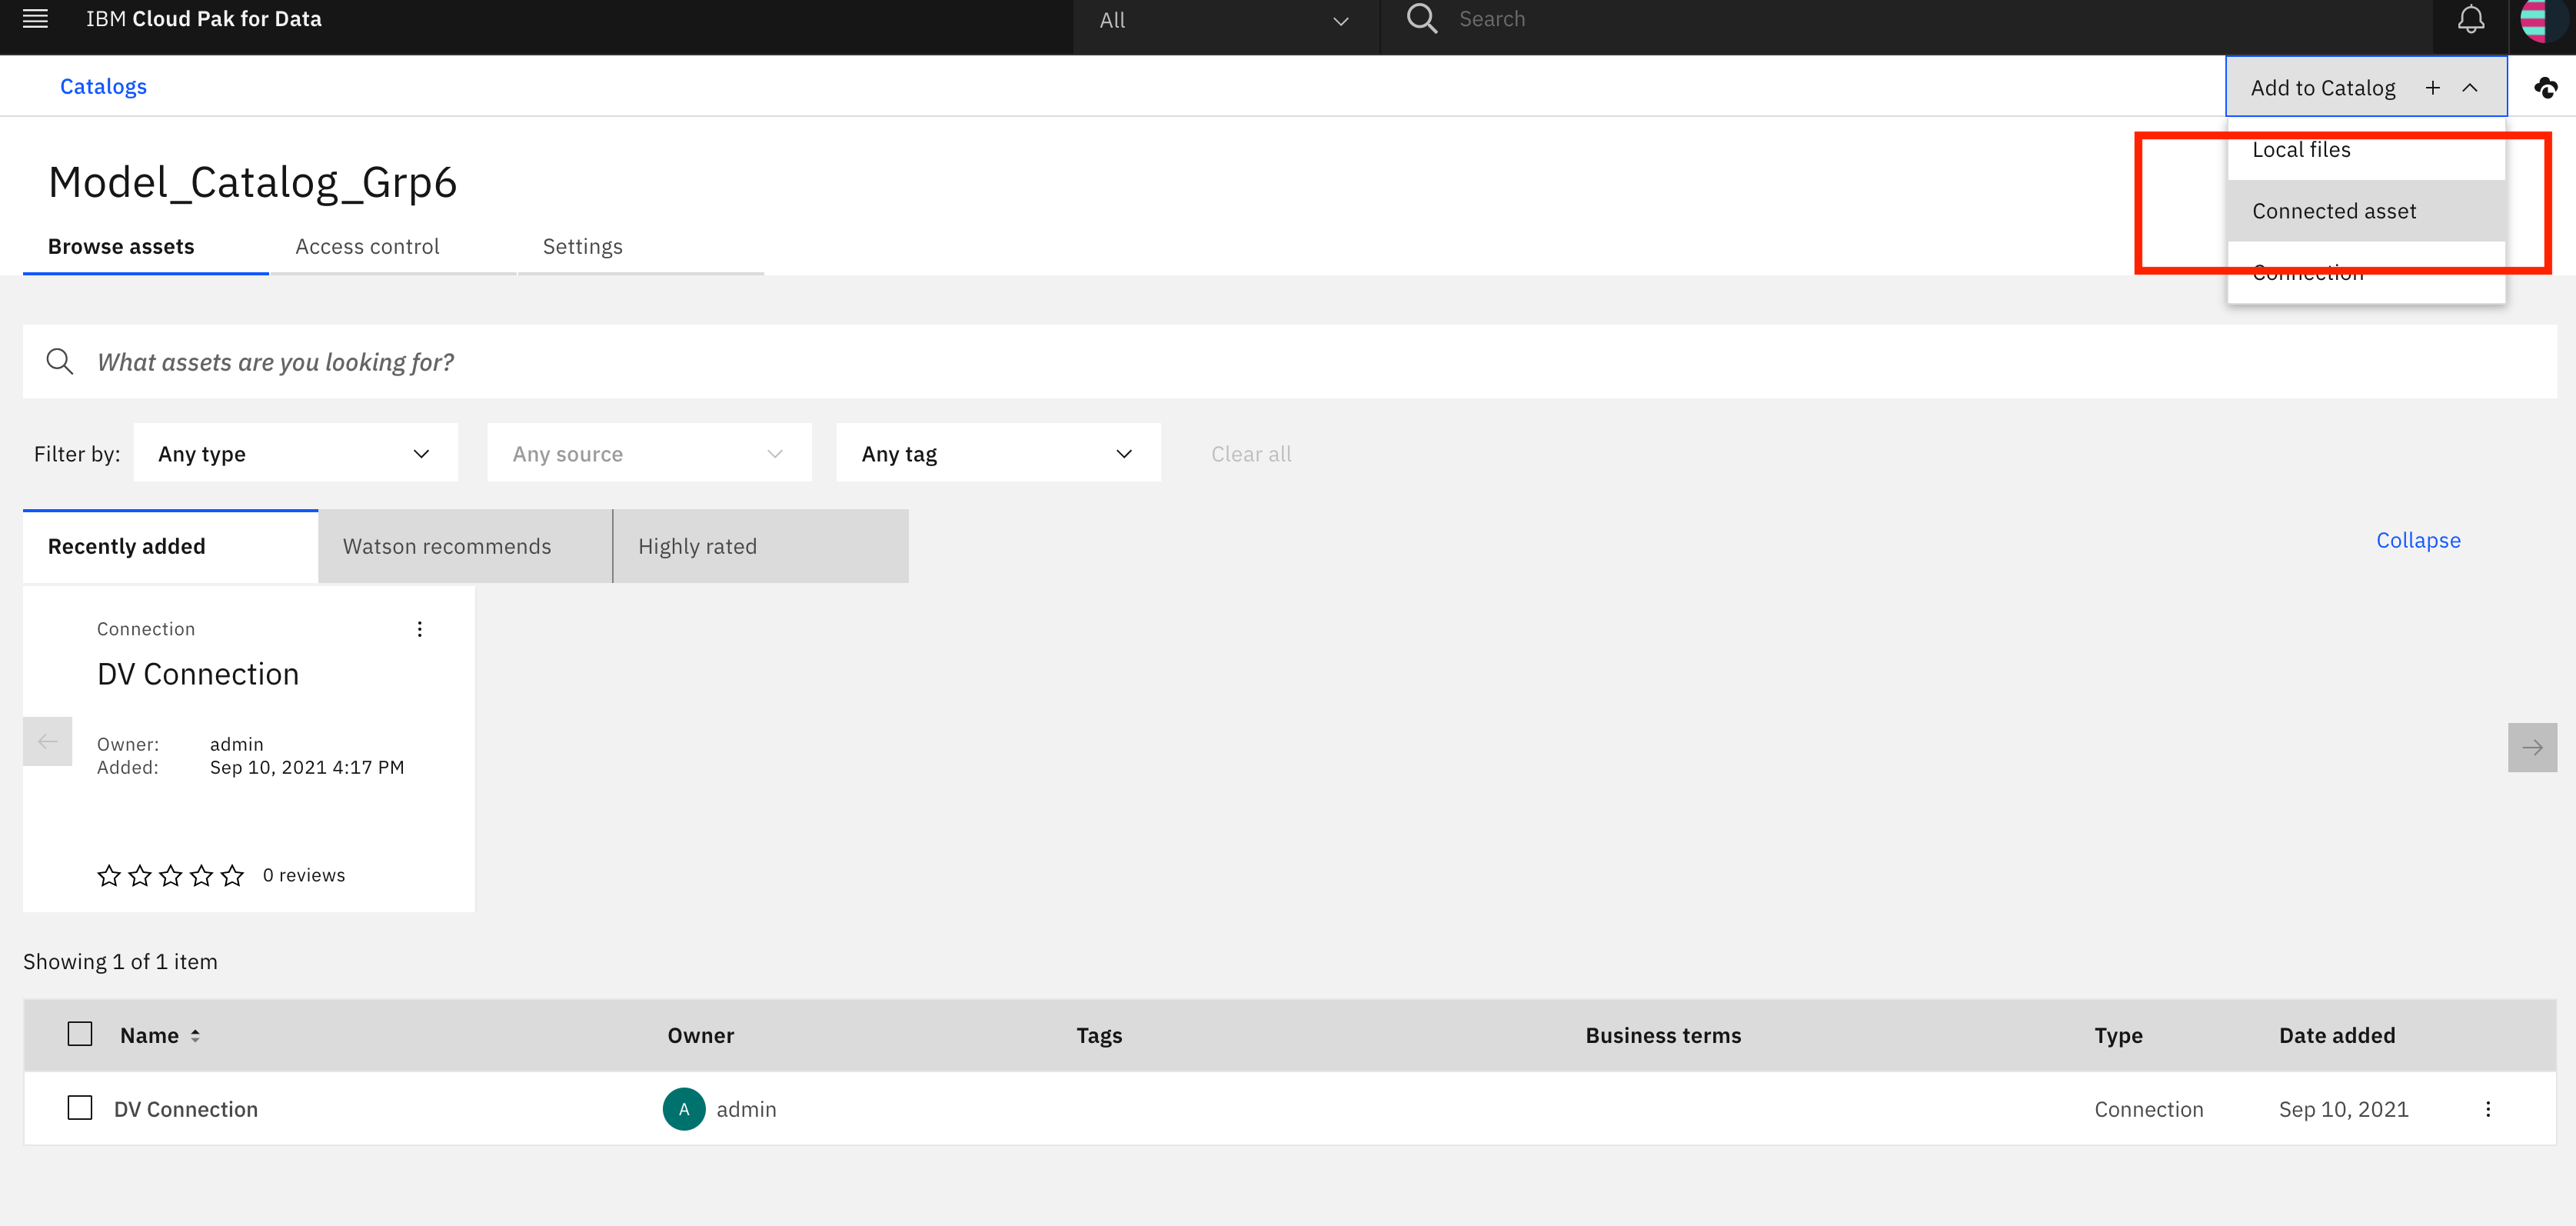

### 14. Choose 'Select source'
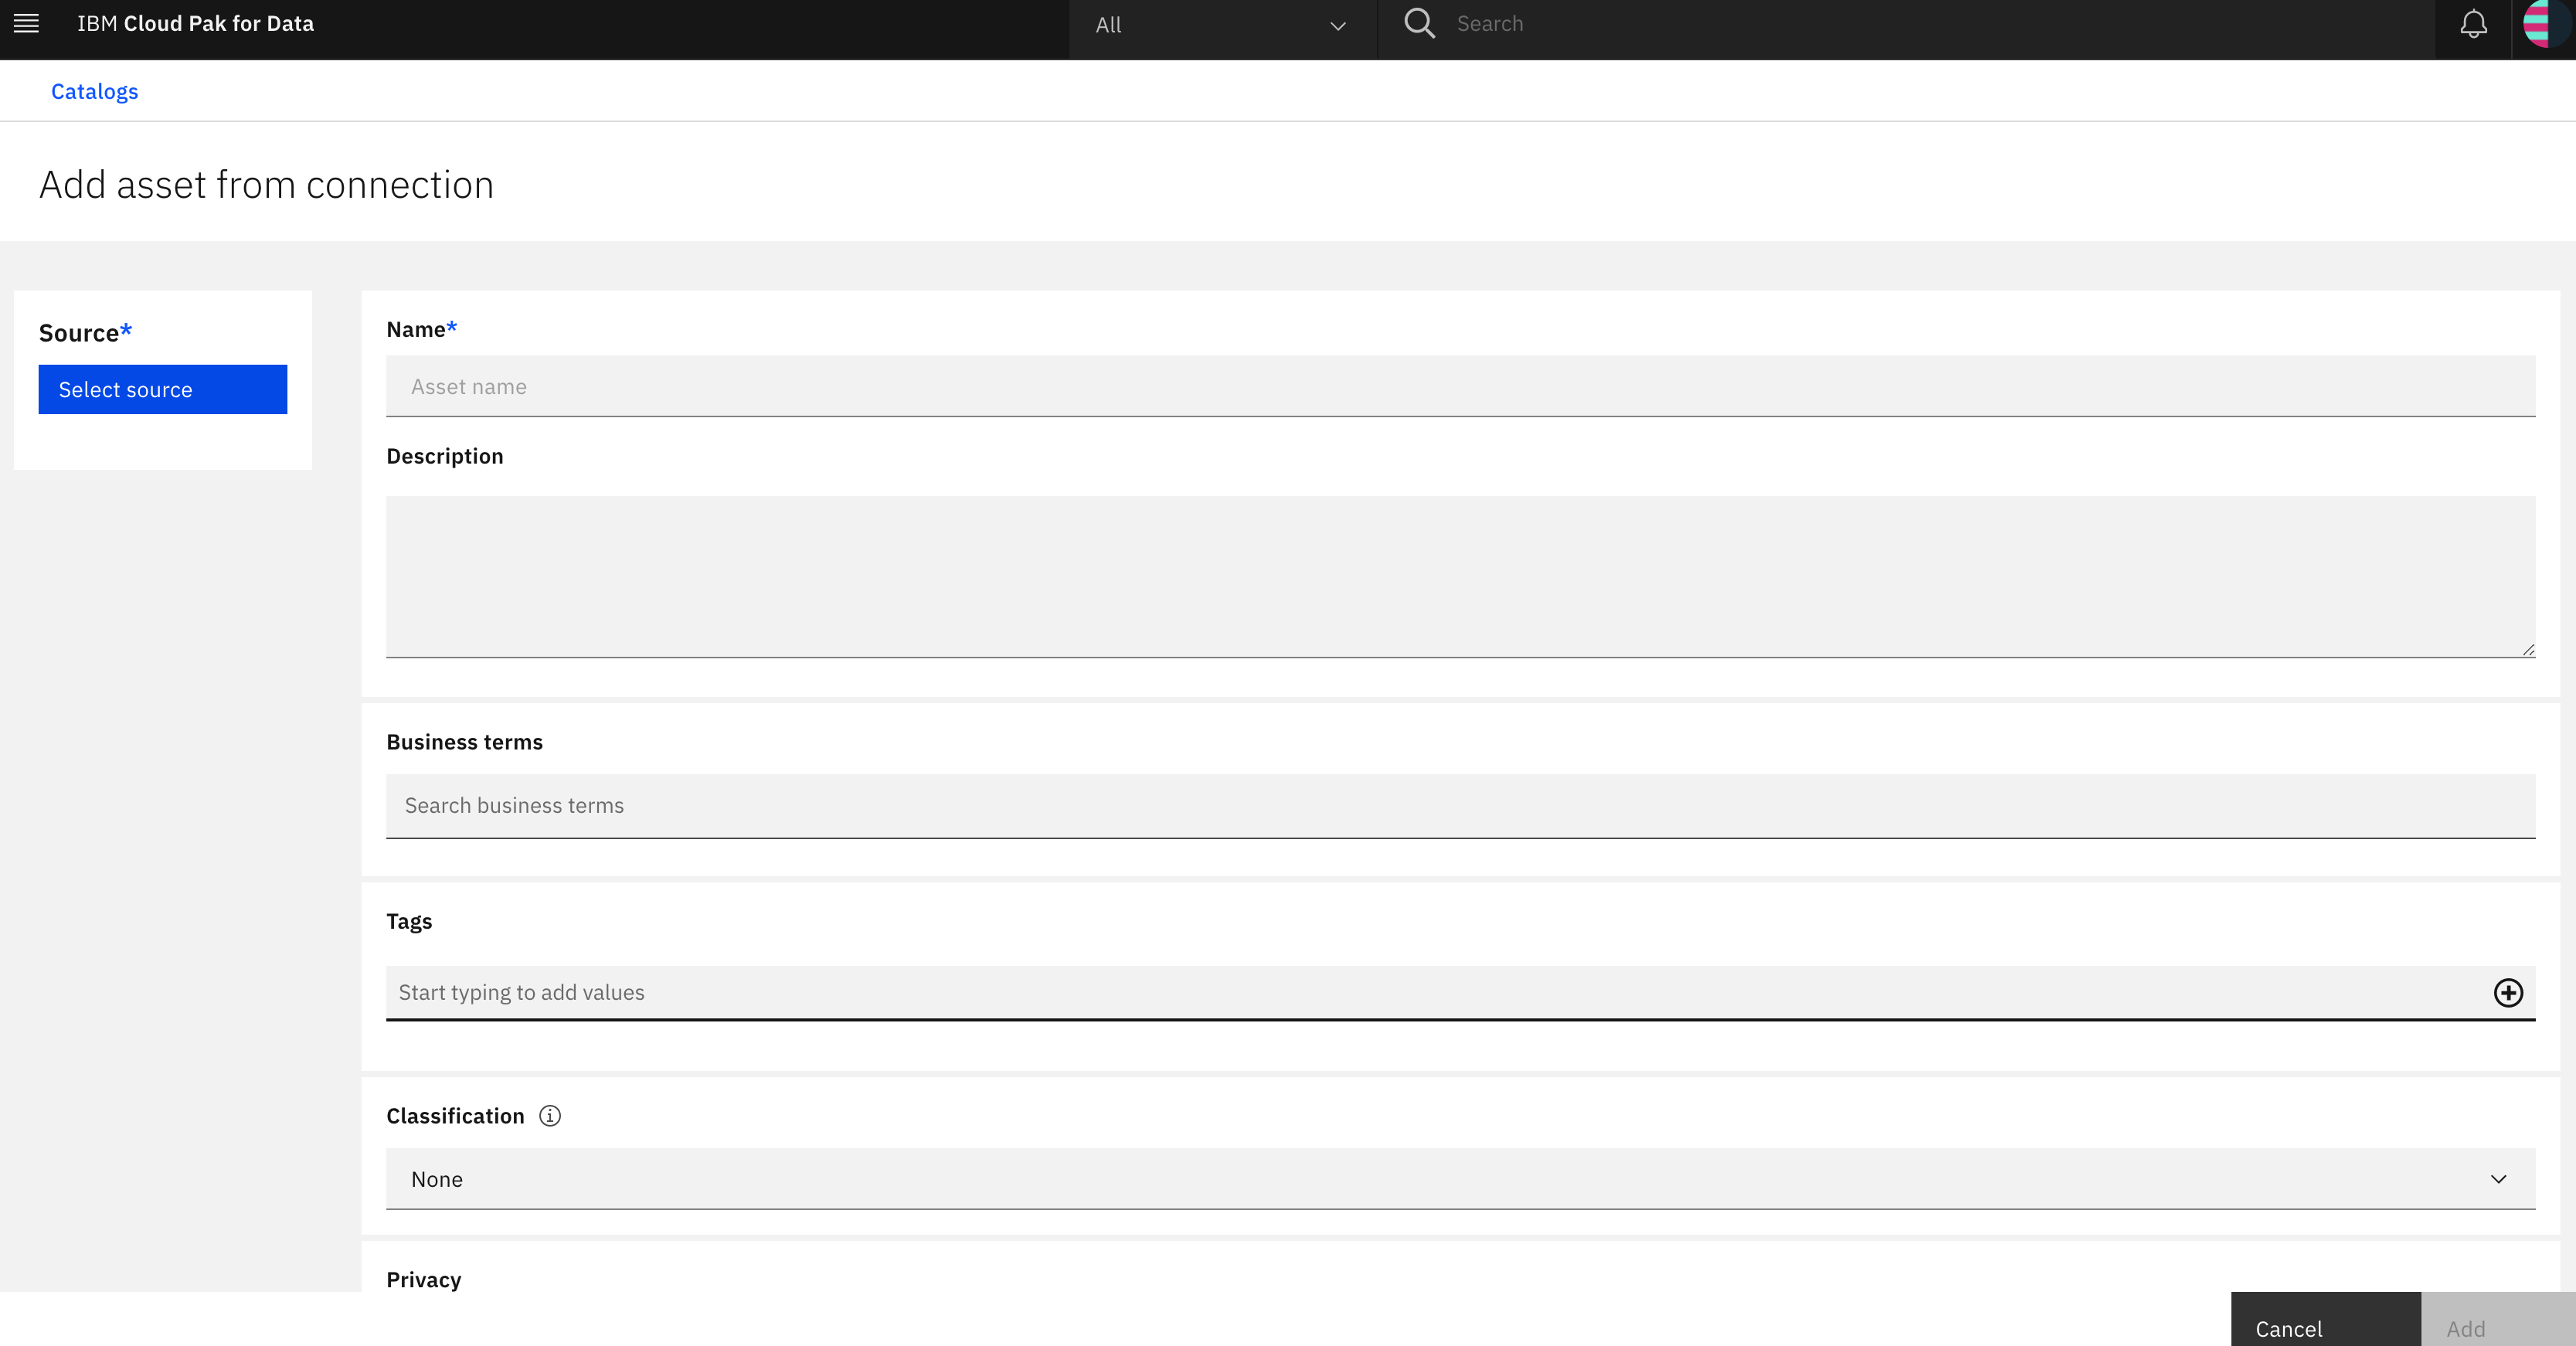


### 15. Choose 'DV Connection' and then select the schema and table corresponding to the virtualized joined view that was created in Step 13.  The table name should be 'AIRLINE_VIRTUALIZED_DATA_GRP_Group#_'.  Then click 'Select' in the bottom right hand corner.
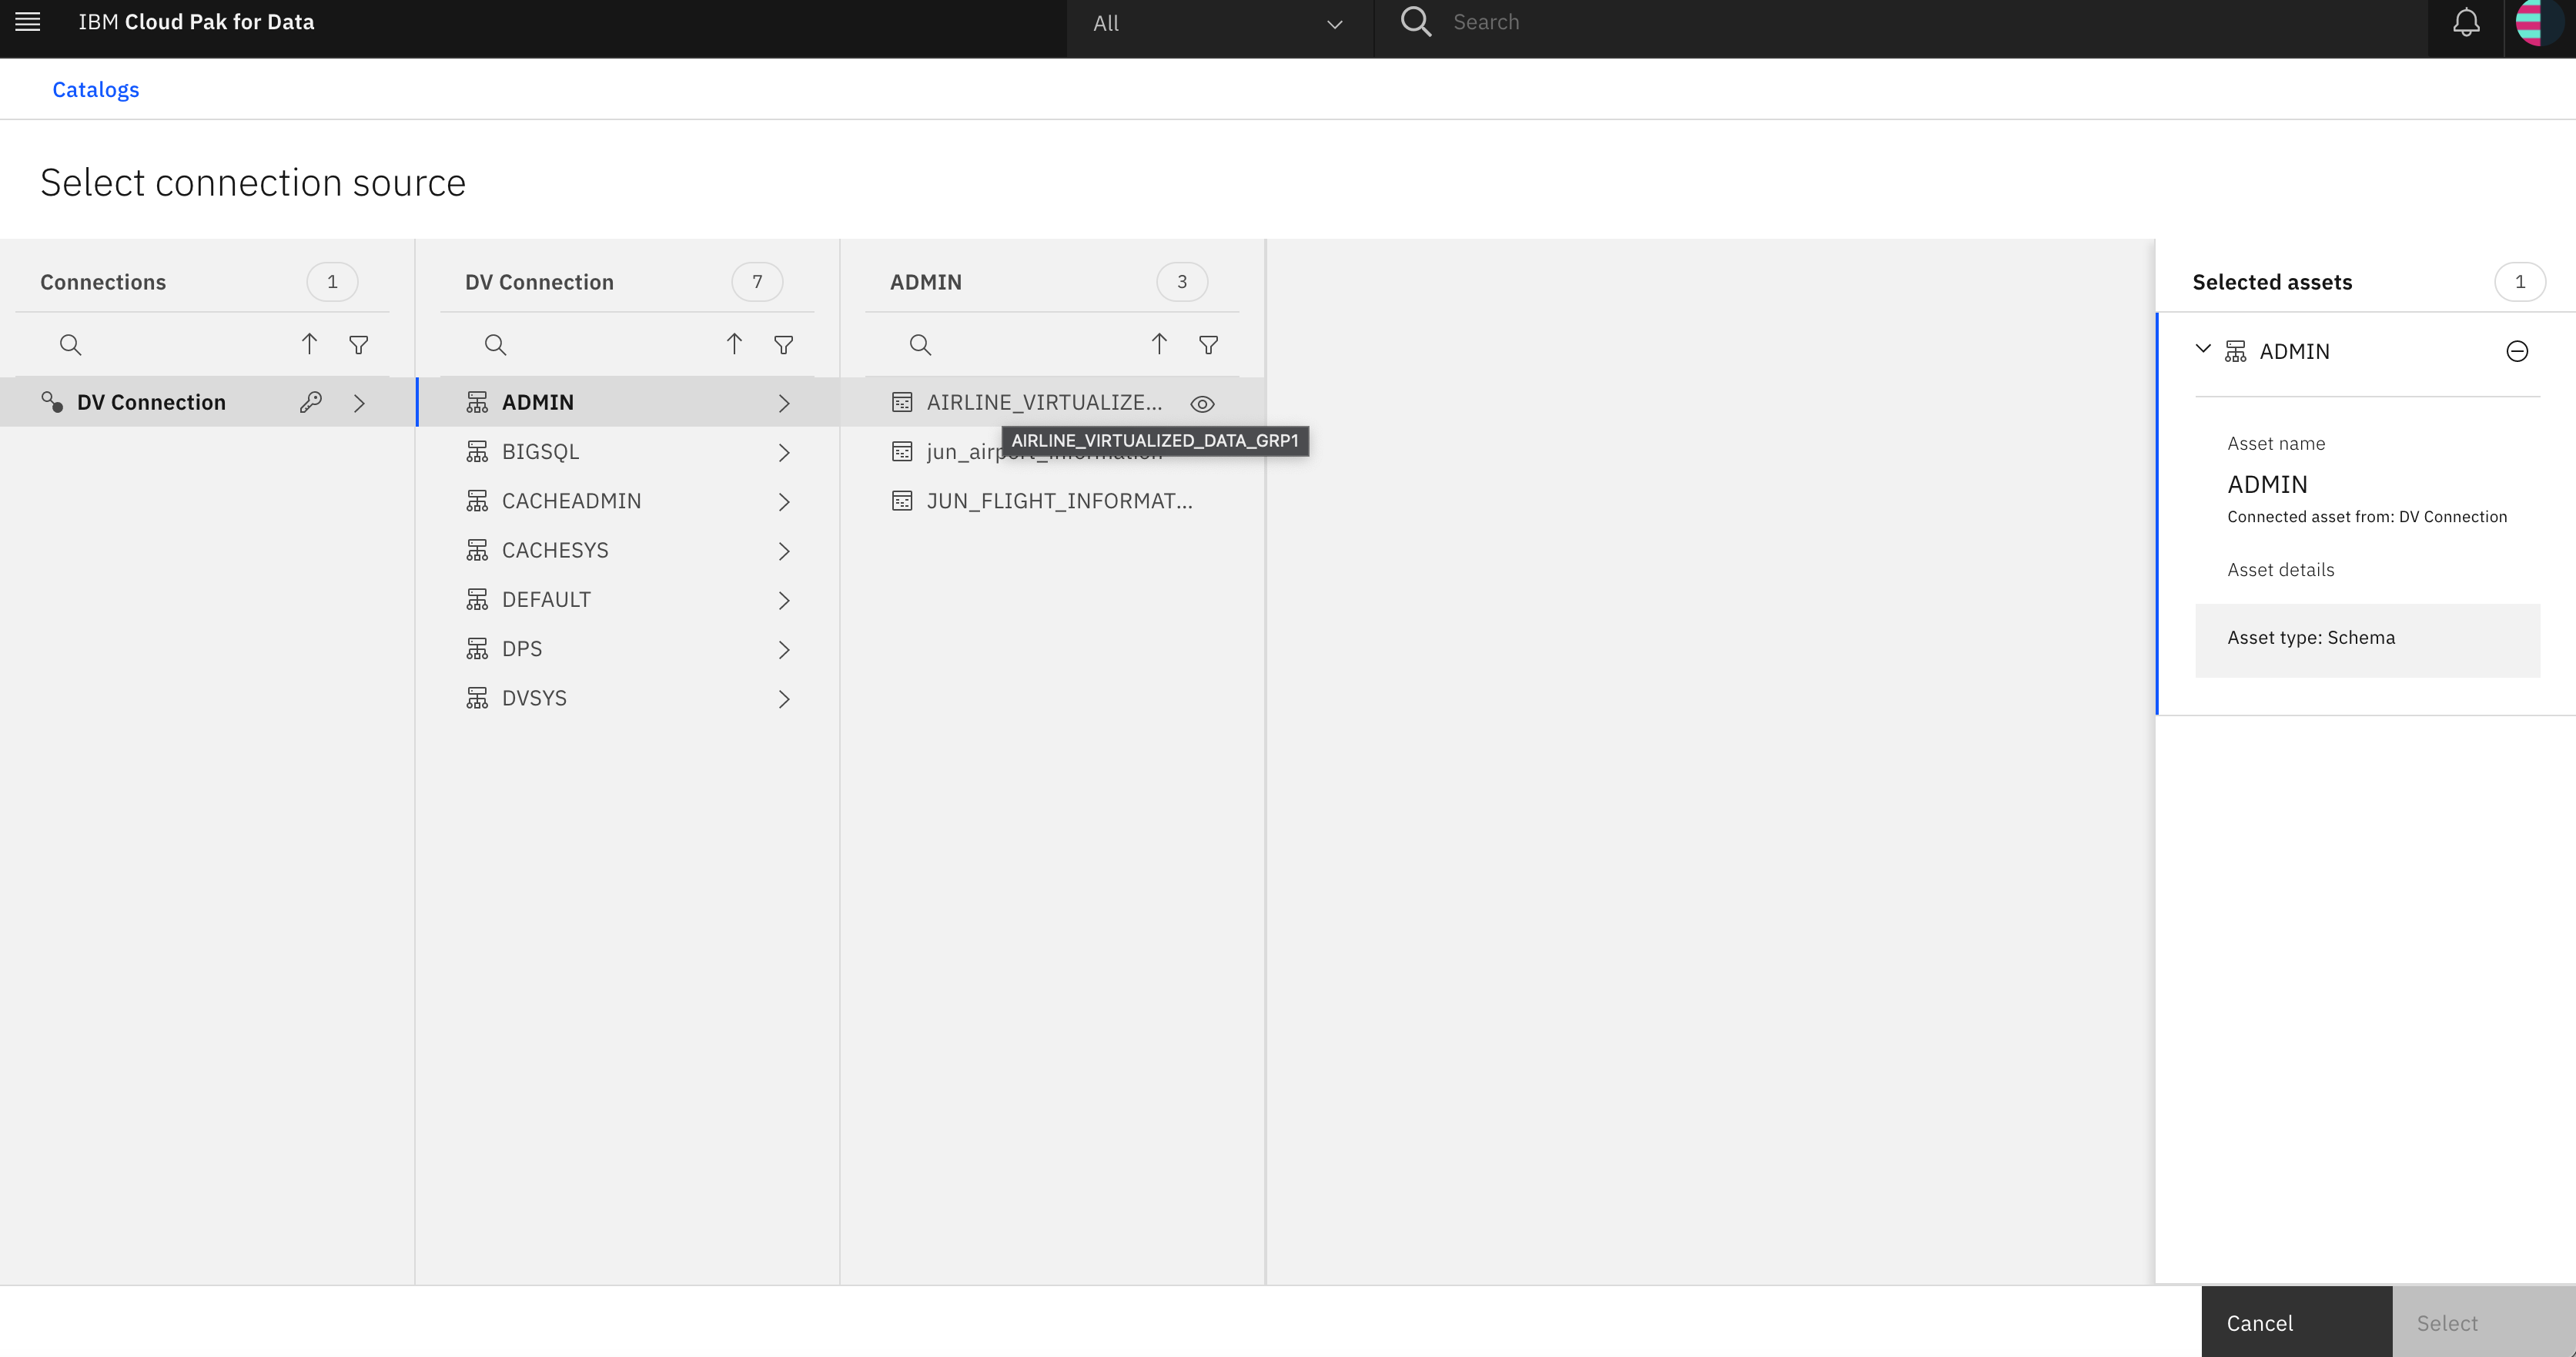

### 16. Provide the name for the asset.  Use the same table name as the virtualized table, but use camel case (e.g. 'Airline_Virtualized_Data_Grp<_Group#_>').  Then select 'Add' in the bottom right hand corner.
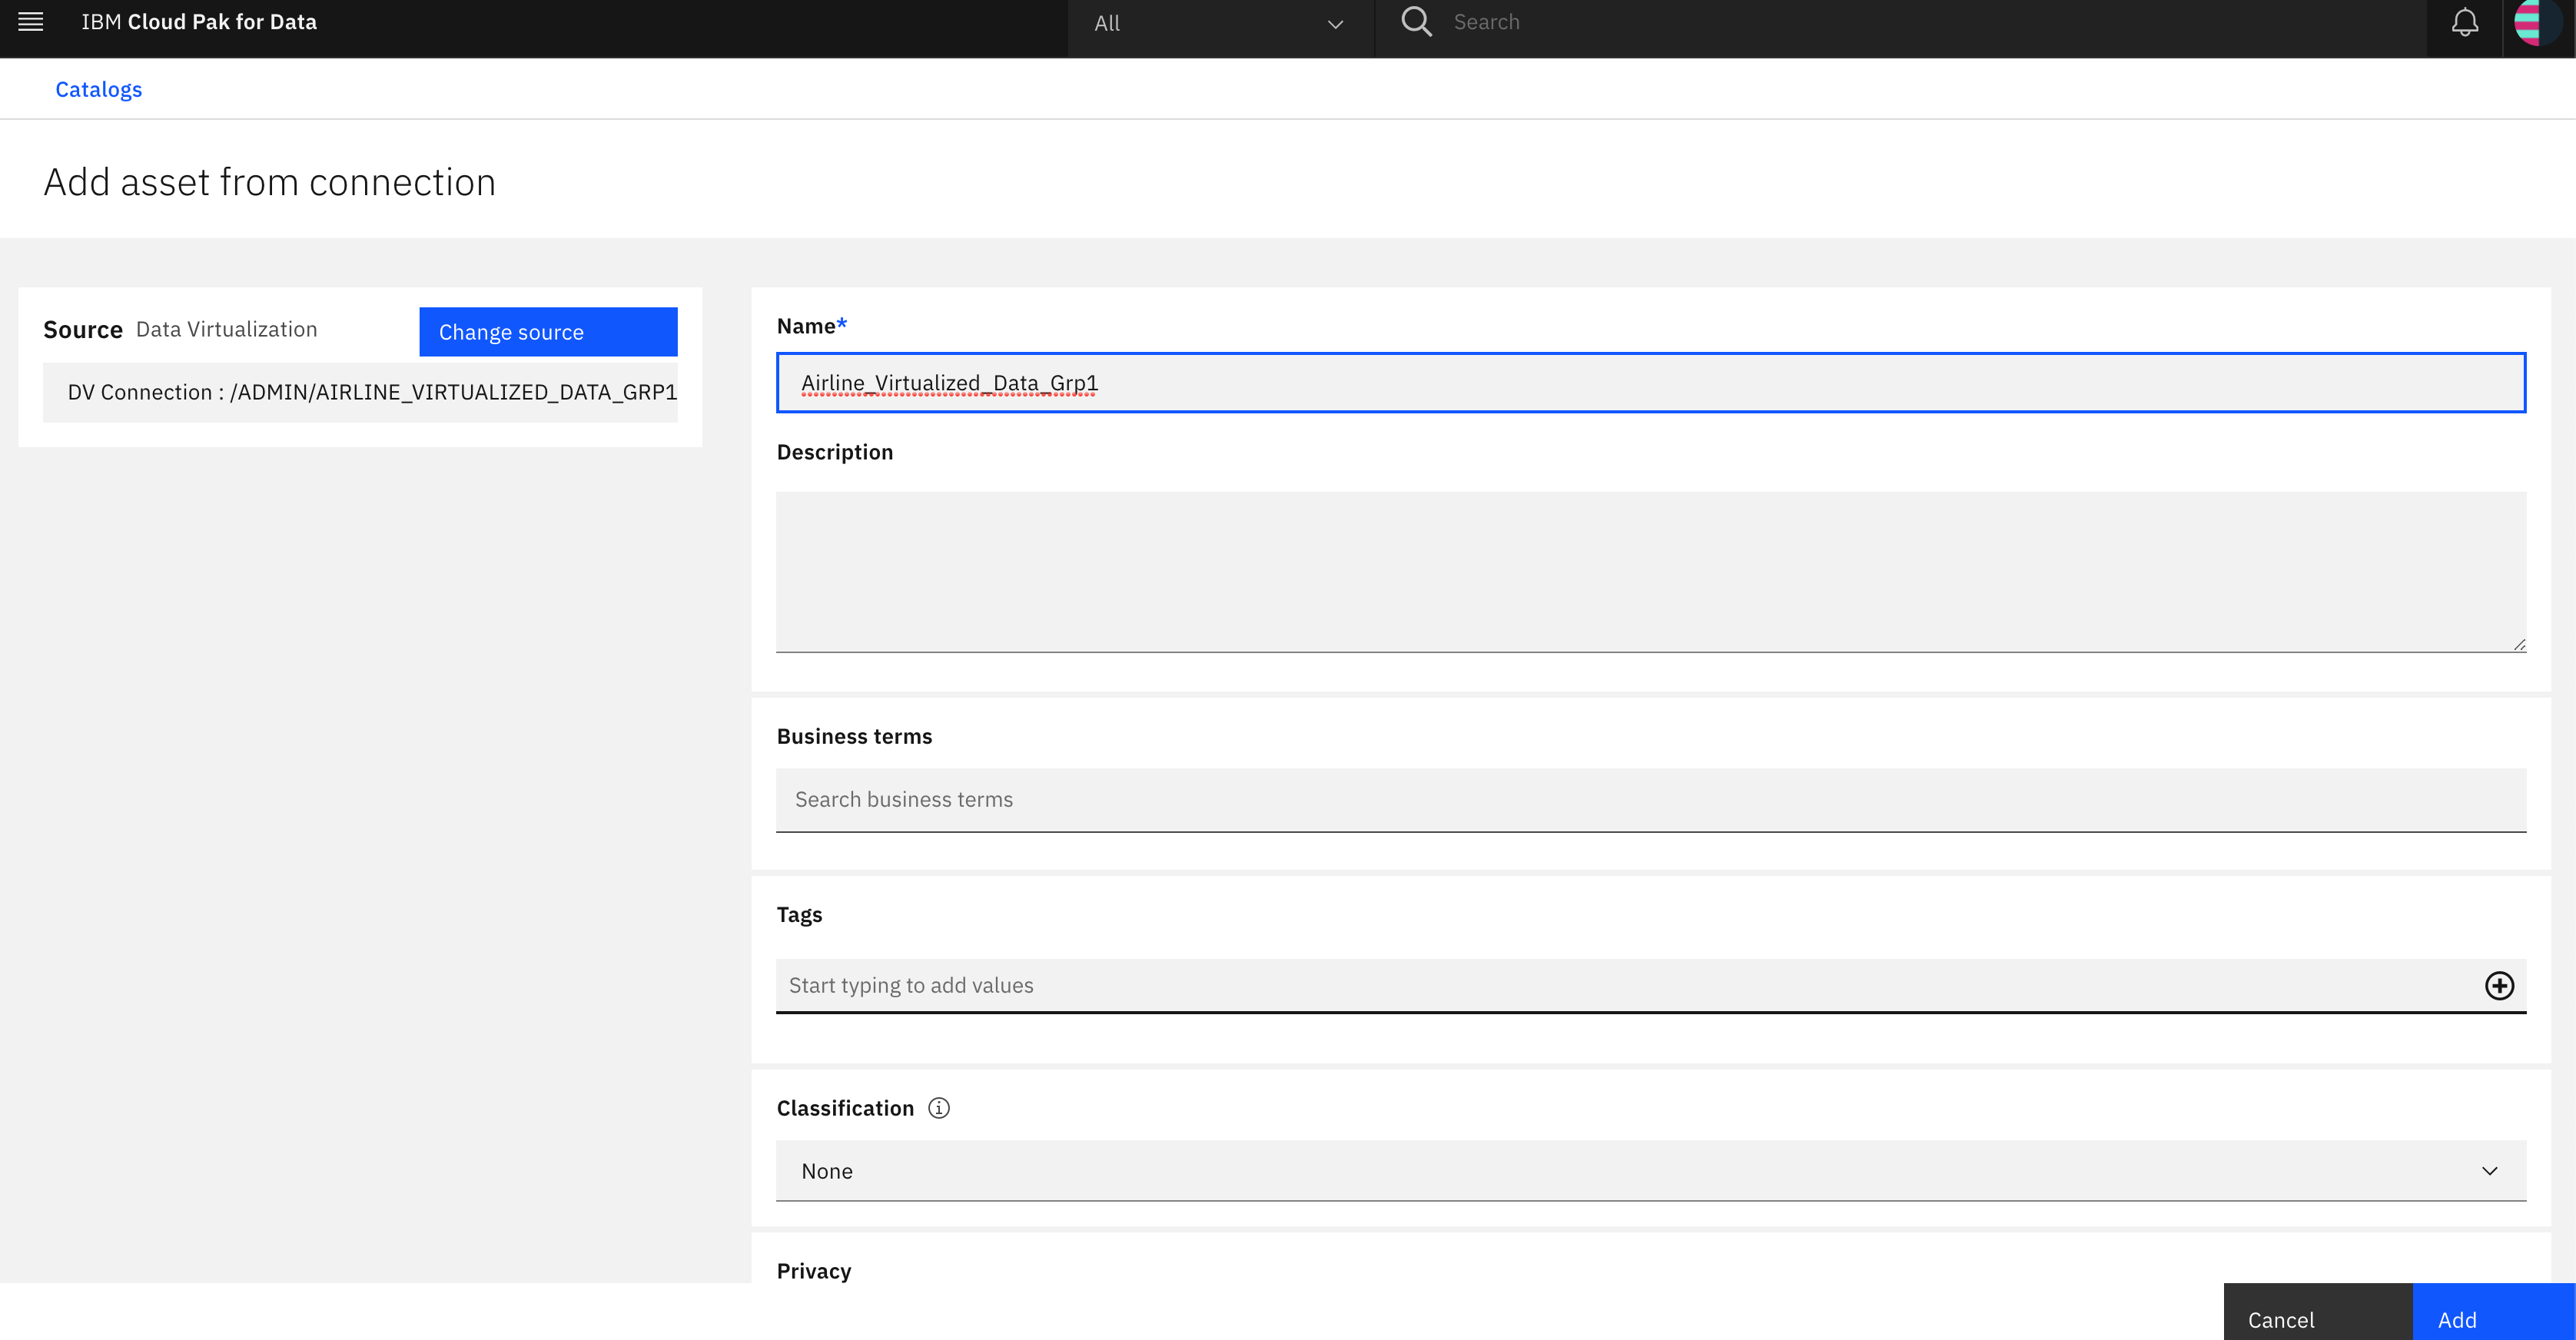

### 17. Now select the newly created asset in the catalog.
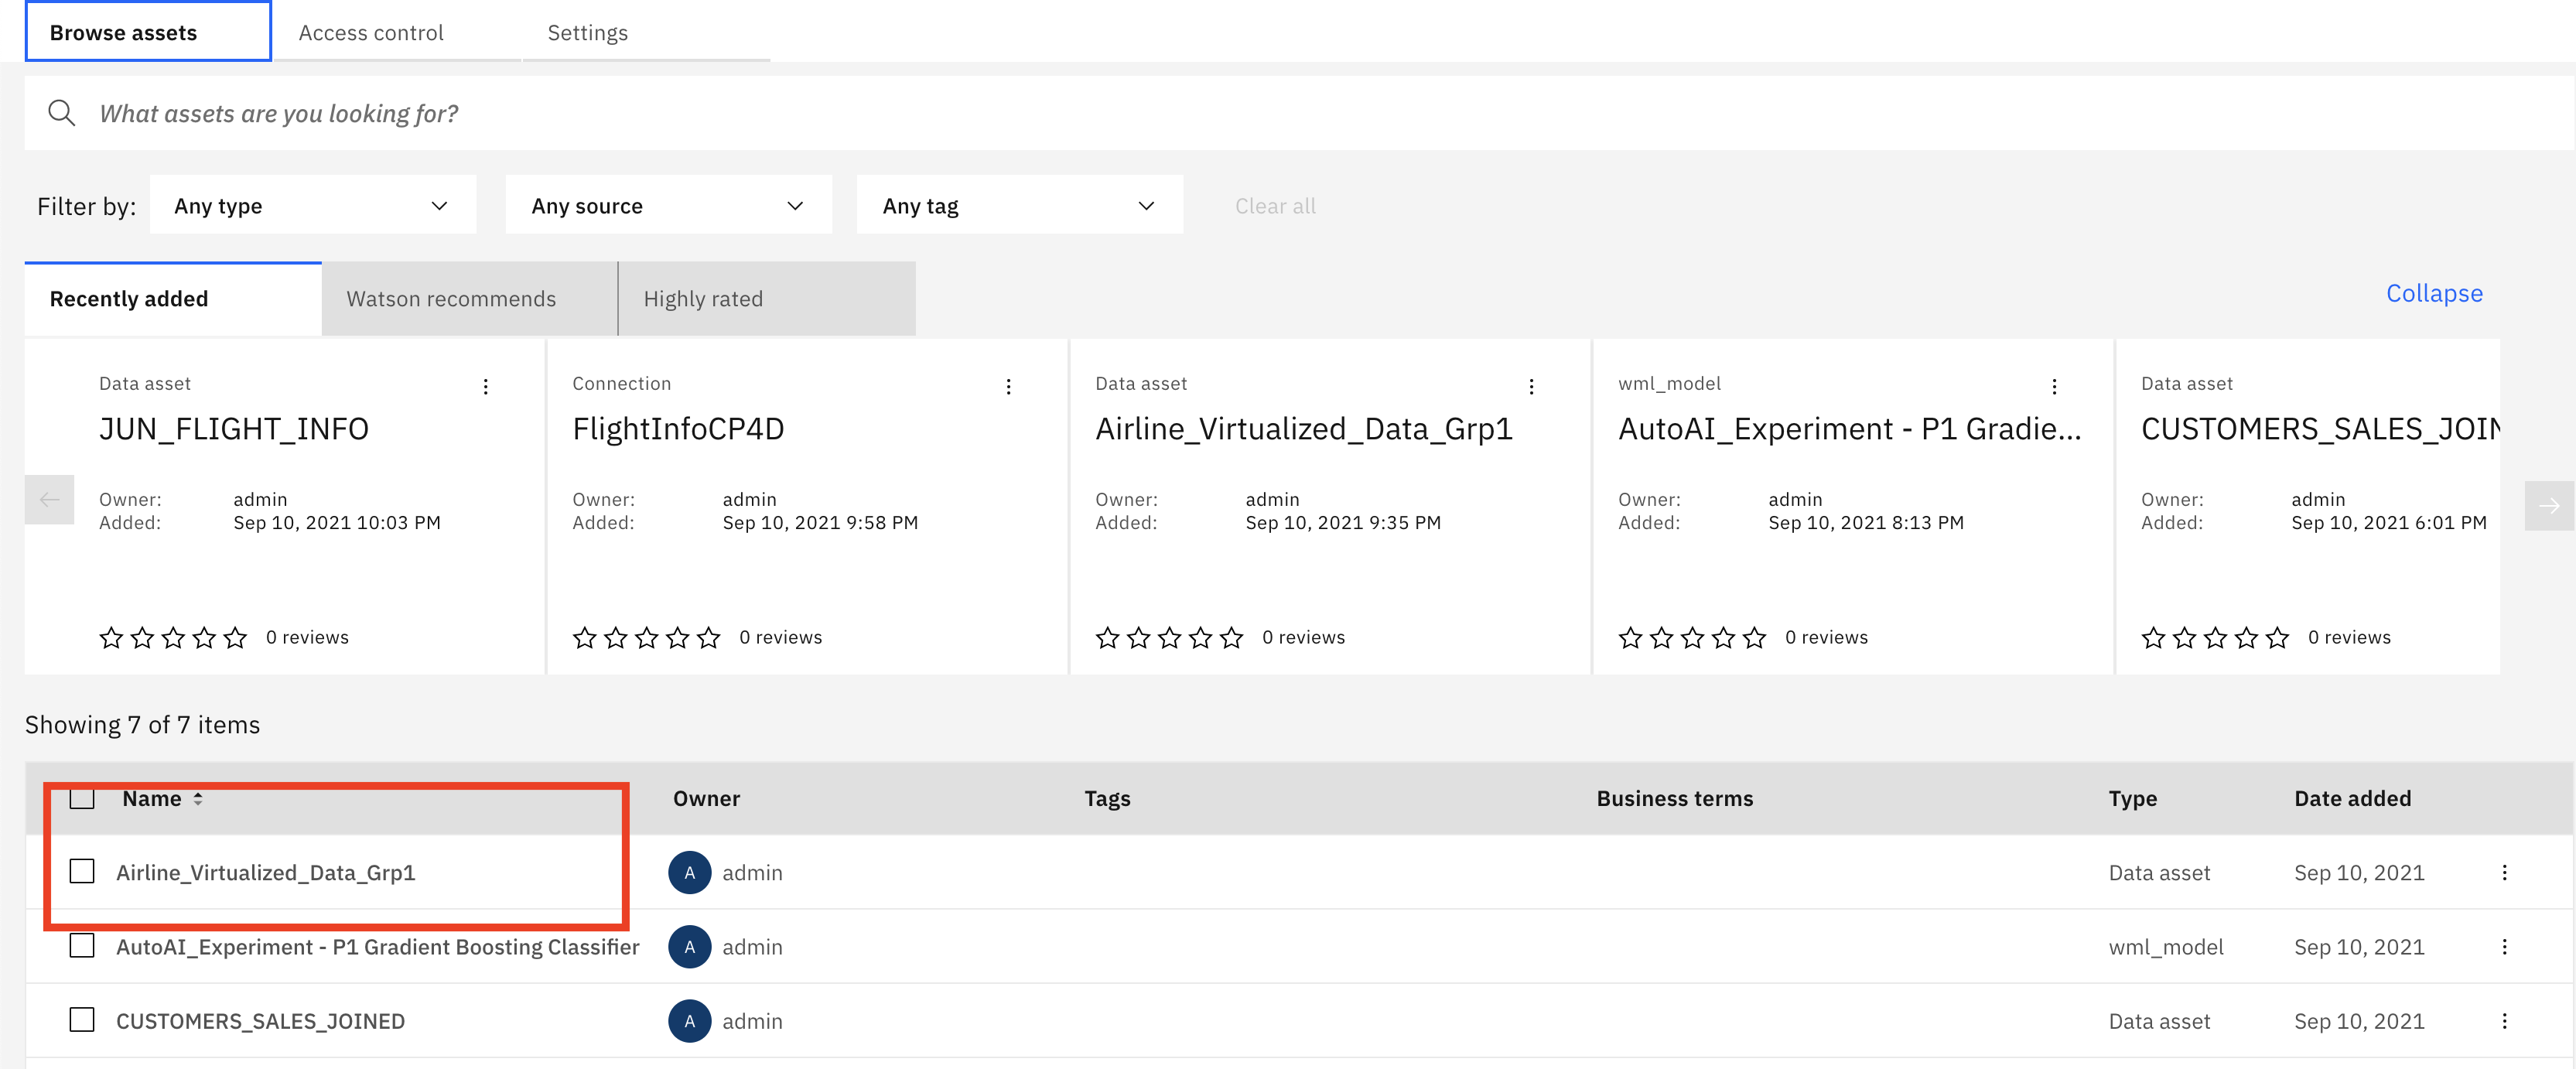


### 18. Select the 'Asset' tab to preview the data in the virtualized joined view.  Your table should contain the same 8 columns that are in the screenshot below.  Notify your instructor if this is not the case.
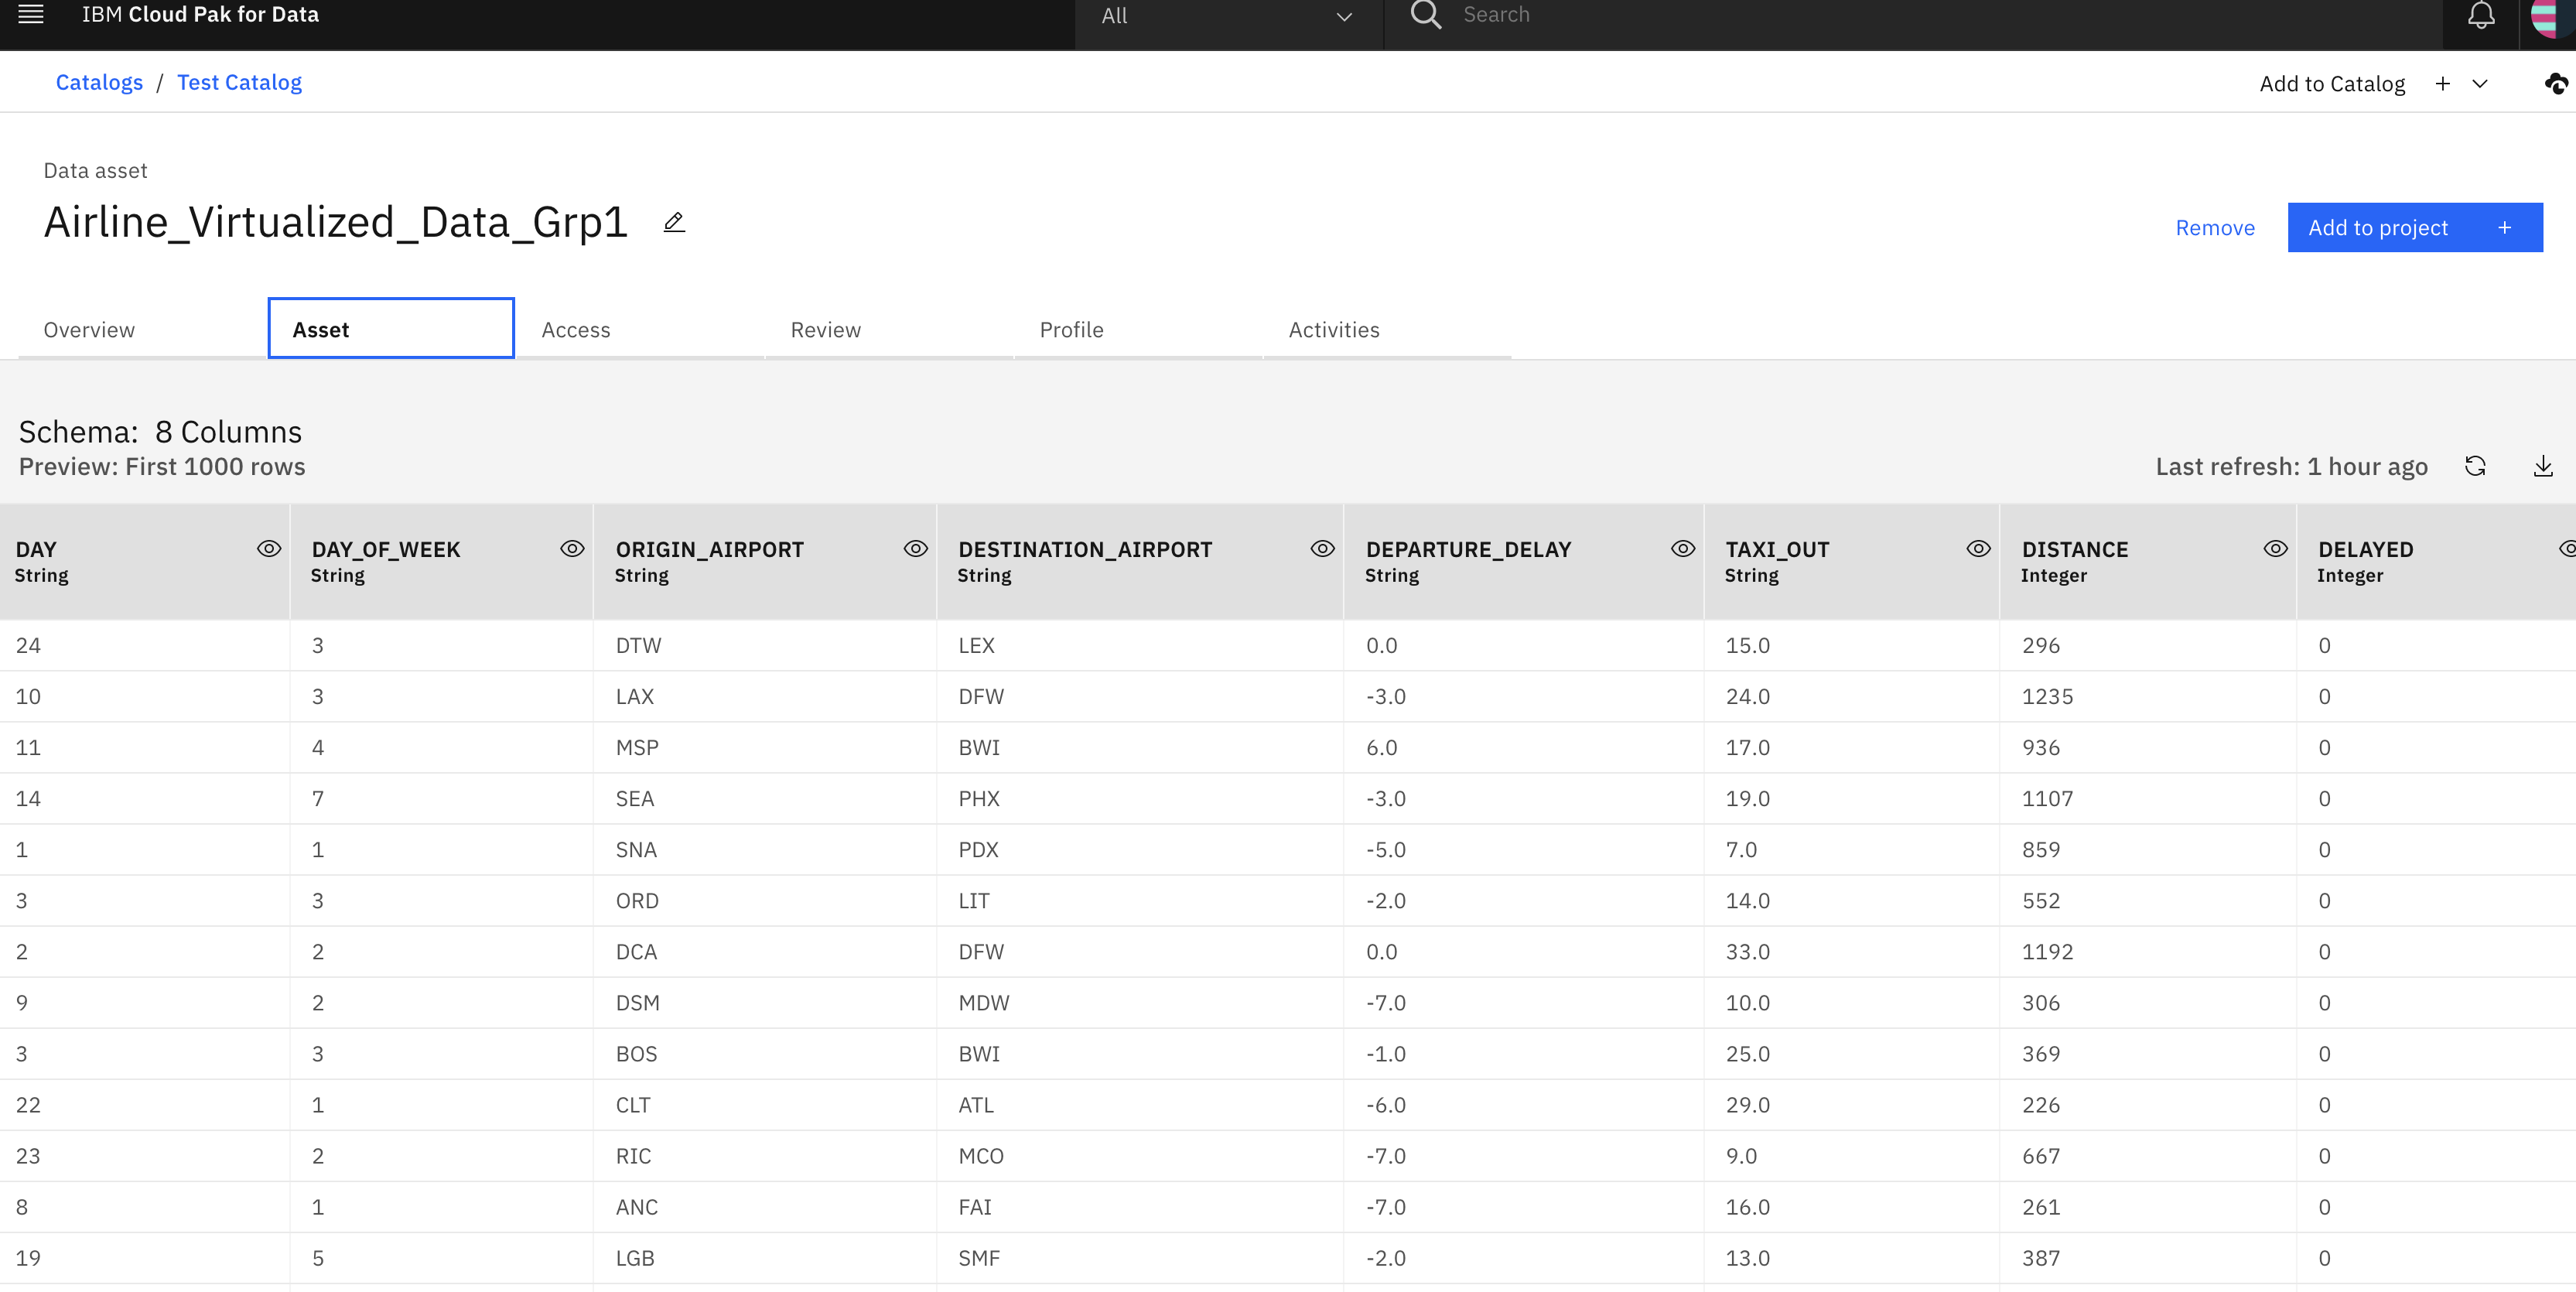

### 19. Now select the 'Profile' tab to view statistical summaries of the columns.
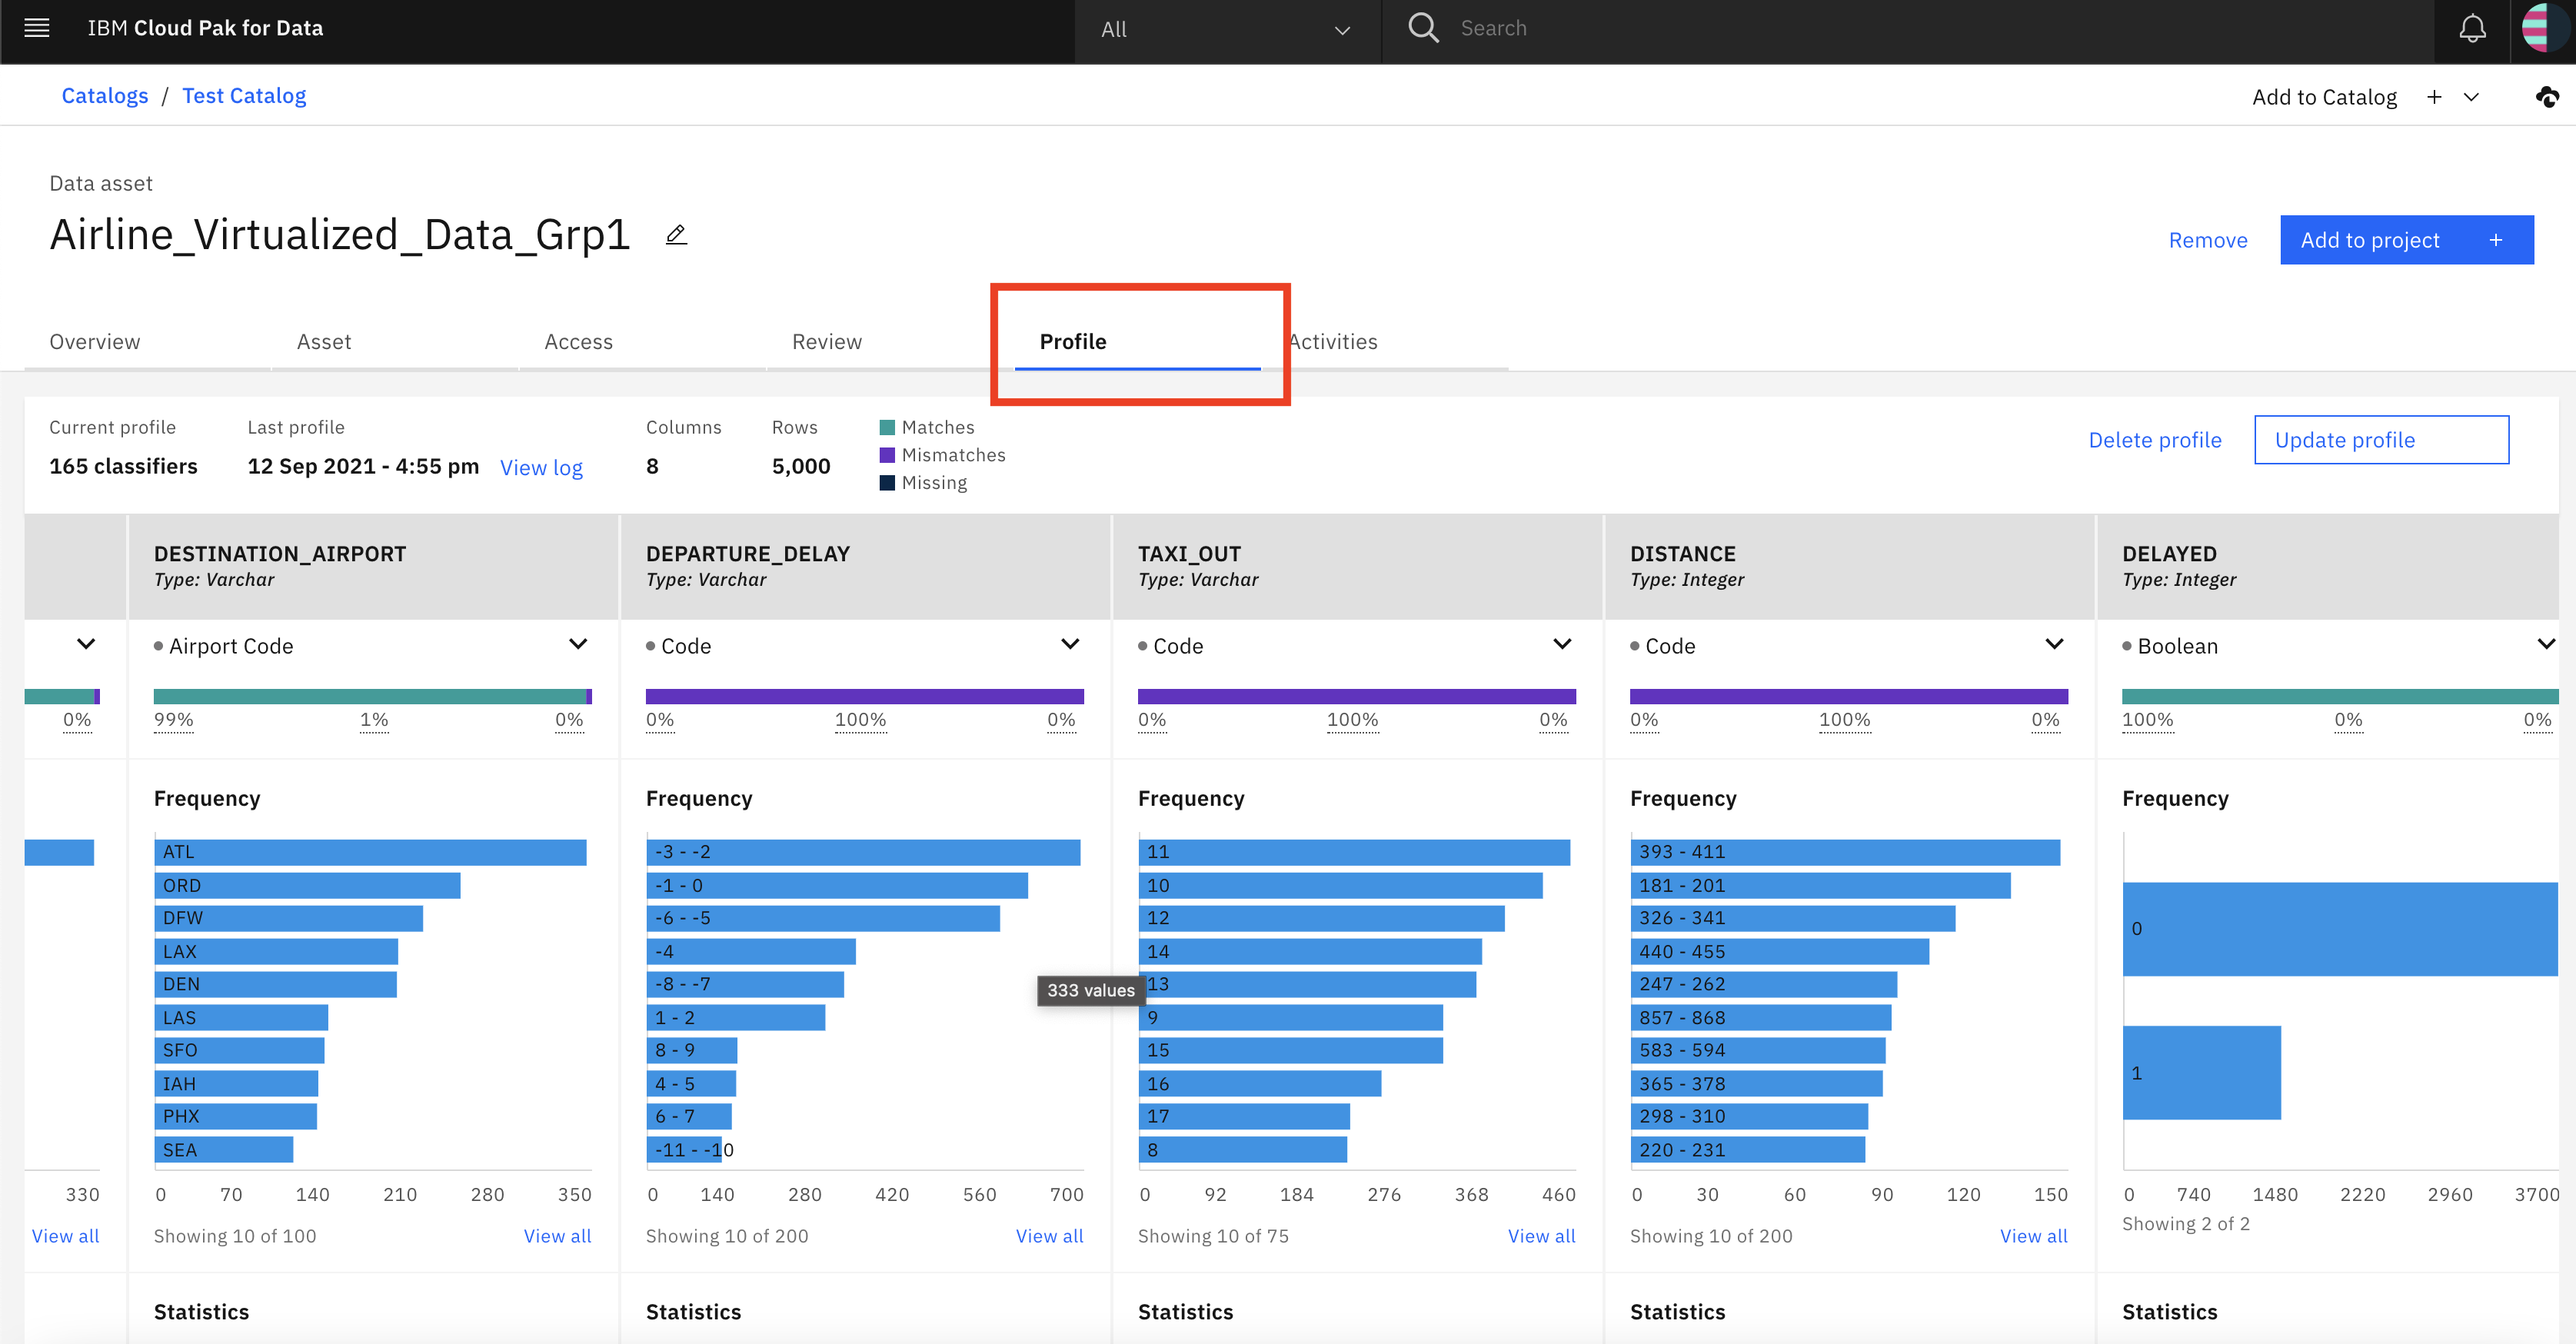